### To create effective visualizations of data you will need to become familiar with Python's Matplotlib package. This lesson follows on from the _"Intro to Pandas and working with CSV files"_ and is modeled after [Section 1 of "Scientists Guide to Plotting Data in Python"](https://www.earthdatascience.org/courses/scientists-guide-to-plotting-data-in-python/plot-with-matplotlib/introduction-to-matplotlib-plots/) written by Jenny Palomino and Leah Wasser, but here we will be working with a global mean surface air temperature dataset.

#### You should be __entering__ this lesson with ...
* Knowledge of Pandas DataFrames and how to open and work with data in a CSV file.
* Having read completely through
[__this lesson__](https://www.earthdatascience.org/courses/scientists-guide-to-plotting-data-in-python/plot-with-matplotlib/introduction-to-matplotlib-plots/ "click here!").

#### You should be __leaving__ this lesson with ...
* The ability to explain the matplotlib object-oriented approach to plotting.
* The ability to create different types of plots using matplotlib.
* The ability to customize plots (including labels and colors) using matplotlib.
* The ability to create figures with multiple plots.

In [67]:
import pandas as pd                          
import matplotlib.pyplot as plt 
import numpy as np
import cmocean 

%matplotlib inline                           
%config InlineBackend.figure_format='retina' 
plt.rcParams['figure.figsize'] = 12,6   

### Load our data into a Pandas DataFrame

In [3]:
GISS_temp = pd.read_csv('./data/temp/gmt_GISTEMP.csv')

In [4]:
GISS_temp

,Year,GISTEMP (degC),GISTEMP uncertainty
0,1880,0.10,0.139
1,1881,0.18,0.134
2,1882,0.16,0.137
3,1883,0.09,0.136
4,1884,-0.01,0.141
...,...,...,...
139,2019,1.25,0.054
140,2020,1.29,0.054
141,2021,1.12,0.054
142,2022,1.16,0.054


### Now we are ready for plotting!

Matplotlib uses an "object oriented approach" to plotting. This means that plots can be built step-by-step by adding new elements to the plot -- each "figure" and "axis" is considered a seperate "object". You can have as many axis objects within your figure object as you want!

* __figure object__: the overall figure space (your entire blank canvas!) that can contain one or more plots.

* __axis objects__: the individual plots that are rendered within the figure.

![image](https://www.earthdatascience.org/images/earth-analytics/plot-data/fig-1-plot.png)

<center> source: https://www.earthdatascience.org/images/earth-analytics/plot-data/fig-1-plot.png </center>

#### We will be using __Pyplot__ module to add different components to figure objects, including creating the individual plots as axis objects, also known as __subplots__. We imported the pyplot module earlier and assigned the alias __plt__ in our import packages cell.

To create a plot using matplotlib’s object oriented approach, you first create the figure (which we assign the variable name "__fig__") and at least one axis (which we assign the variable name "__ax__") using the subplots() function from the pyplot module:

Notice that the fig and ax are created at the same time by setting them equal to the output of the pyplot.subplots() function. As no other arguments have been provided, the result is a figure with one plot (your axis object) that is empty but ready for data.

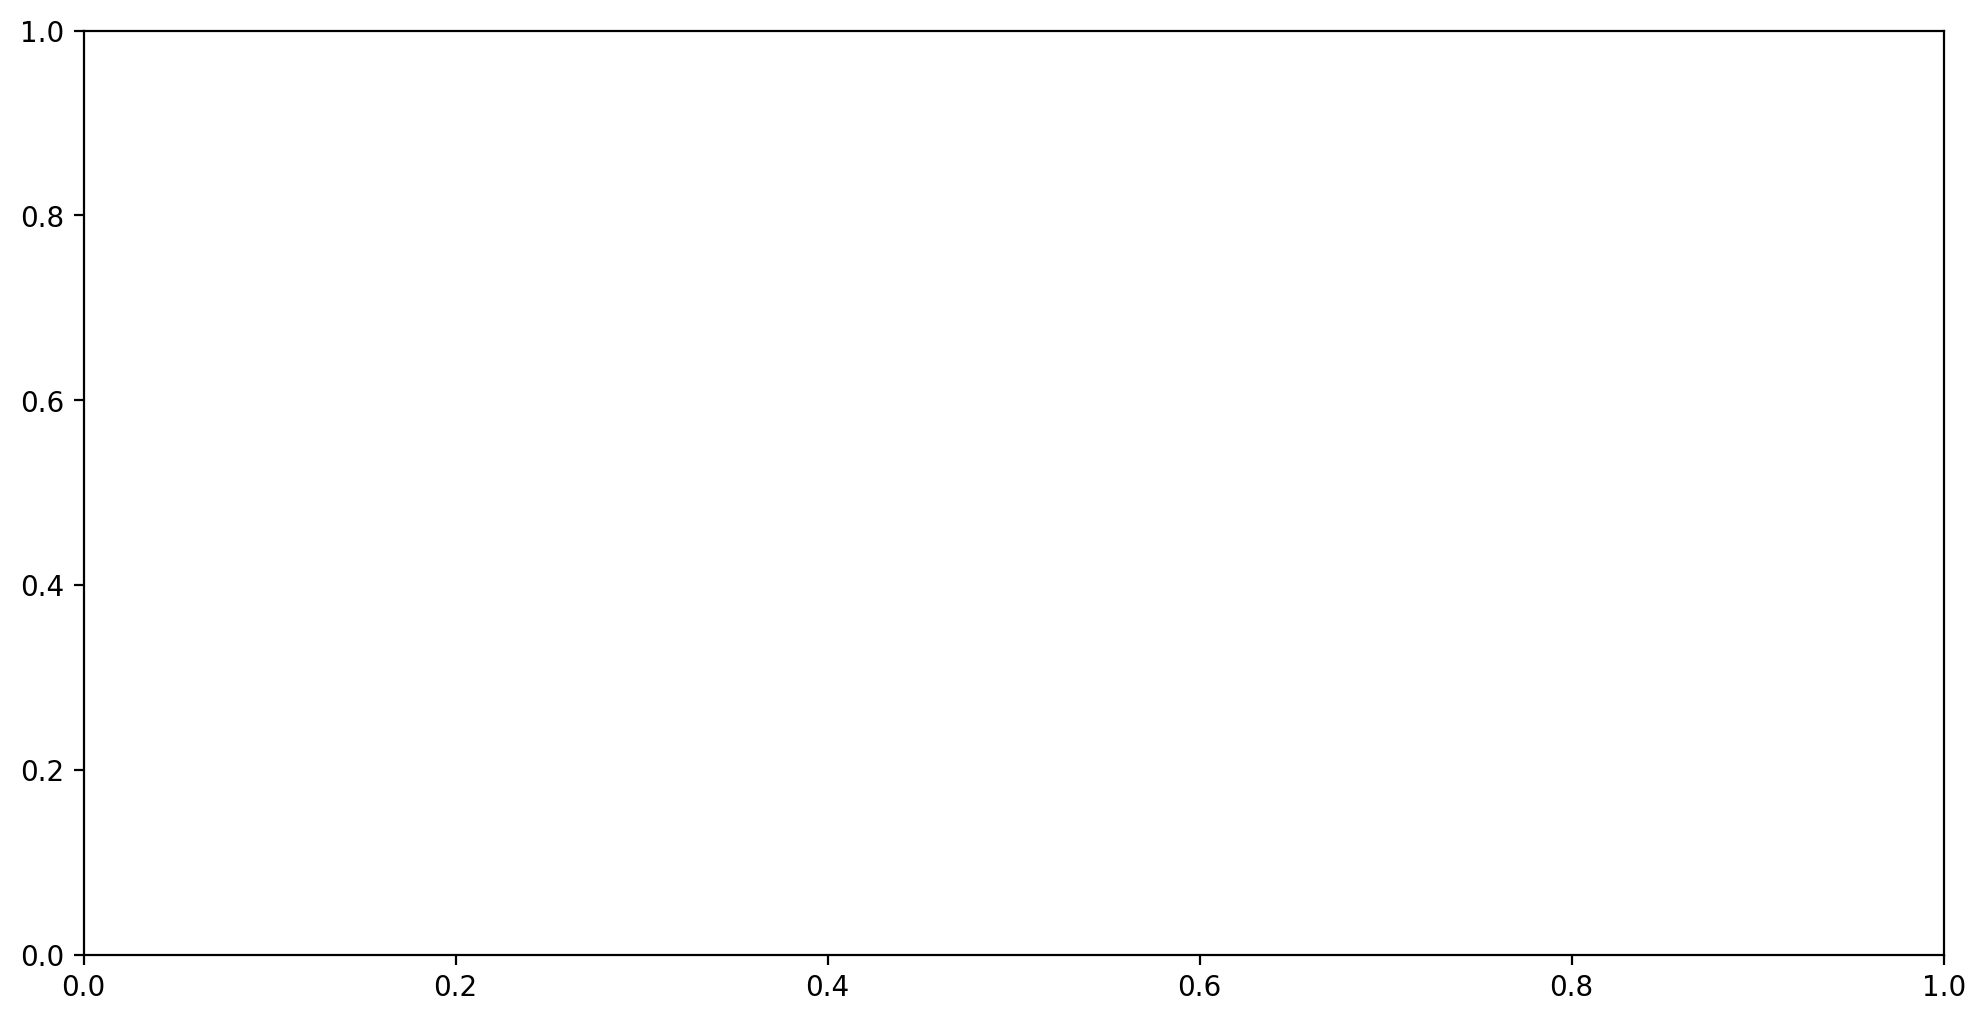

In [5]:
fig, ax = plt.subplots() 
## fig and ax are just variable names for the figure and axis objects,
## we really can call them anything we want (f, a, etc .. but fig, ax keeps it intuitive)
## It is considered good practice to call the figure fig and axes ax, ax1, ax2 (etc).

#### What if we wanted to change our figure size?

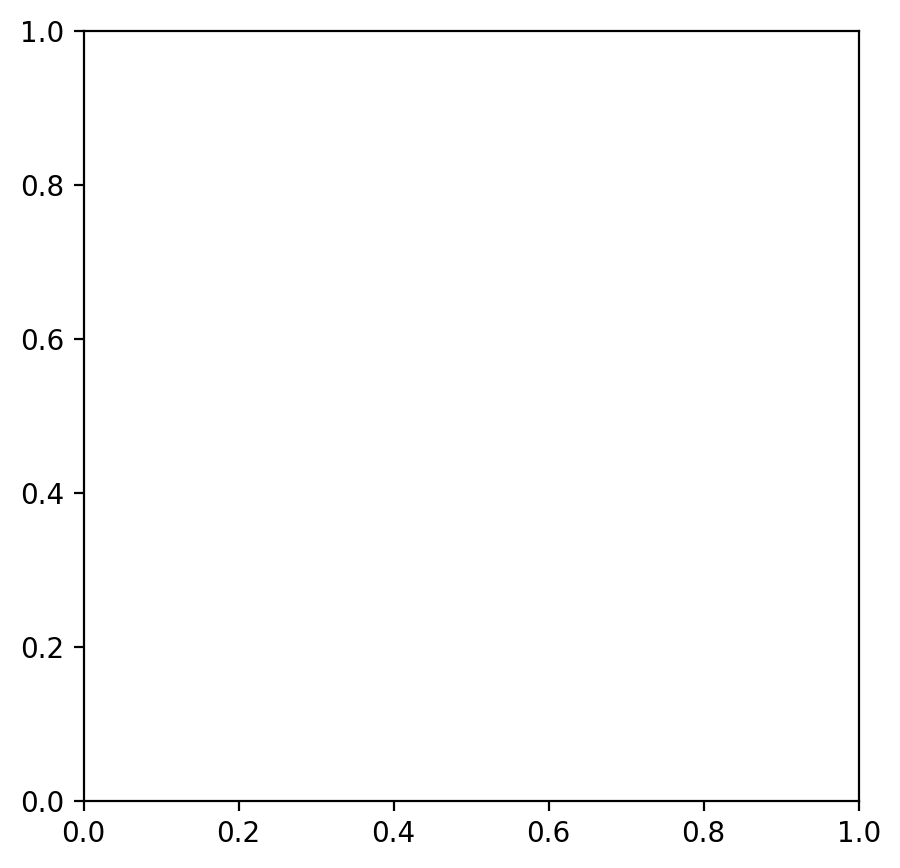

In [6]:
## figsize = (width, height)
fig, ax = plt.subplots(figsize = (5, 5))


### Lets add our data to our plot.

Here we are calling the .plot method of the ax object and specifying the arguments for the x axis and the y axis of the plot as follows: __ax.plot(x_axis, y_axis)__. In our case we want our x_axis to be the calendar date and our y_axis to be atmospheric CO2 concentration, so we must specify the appropriate columns within our pandas DataFrame.

Text(0.5, 0, 'Year')

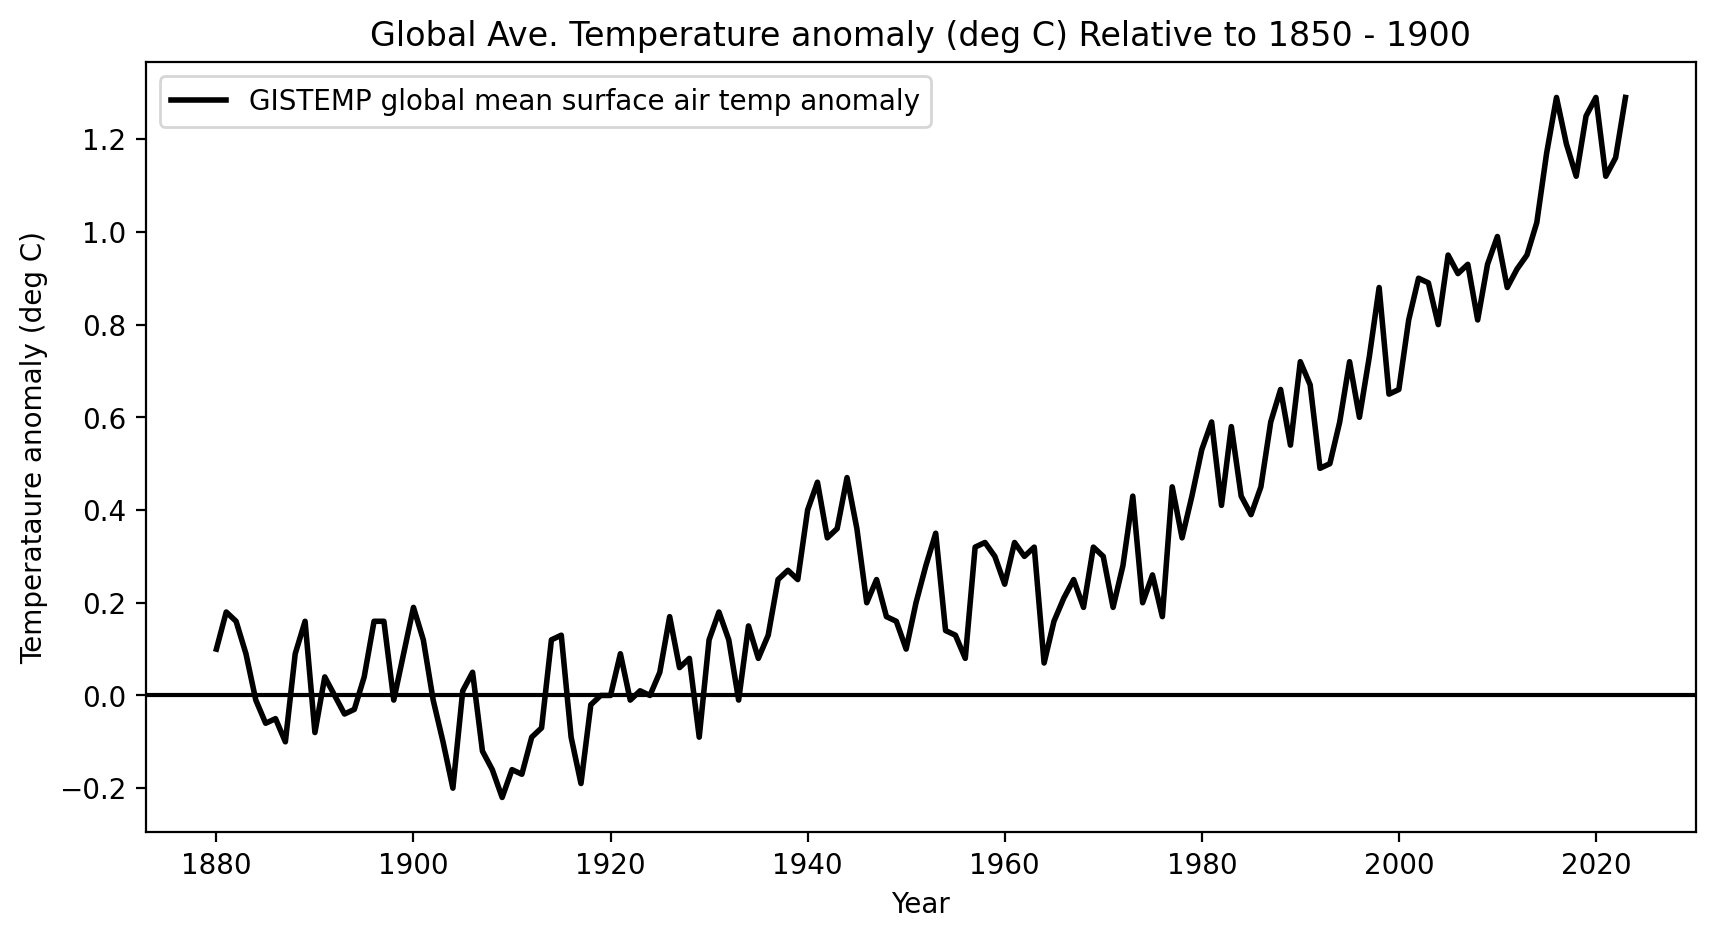

In [29]:
## Here we have added additional arguments of linewidth, label, and color to specify
## the line thickness, lable for the legend, and the color of the line. There are more 
## customizations you can make, but more on this later.

fig, ax = plt.subplots(figsize = (10, 5))

ax.plot(GISS_temp['Year'],
        GISS_temp['GISTEMP (degC)'],
        linewidth=2,label='GISTEMP global mean surface air temp anomaly',
        color='black')

## plot a legend on the ax
ax.legend() 

## add a horizontal line at 0 !
ax.axhline(0,color='k')

## add plot title:
ax.set_title('Global Ave. Temperature anomaly (deg C) Relative to 1850 - 1900')

## add axes labes:
ax.set_ylabel('Temperataure anomaly (deg C)')
ax.set_xlabel('Year')

### By default, ax.plot() creates a line plot. What if we wanted to make a scatter or bar plot instead?
* __Scatter plots__ (using ax.scatter): values are displayed as individual points that are not connected with a continuous line.
* __Bar plots__ (using ax.bar): values are displayed as bars with height indicating the value at a specific point.

### Scatter Plot

Text(0.5, 0, 'Year')

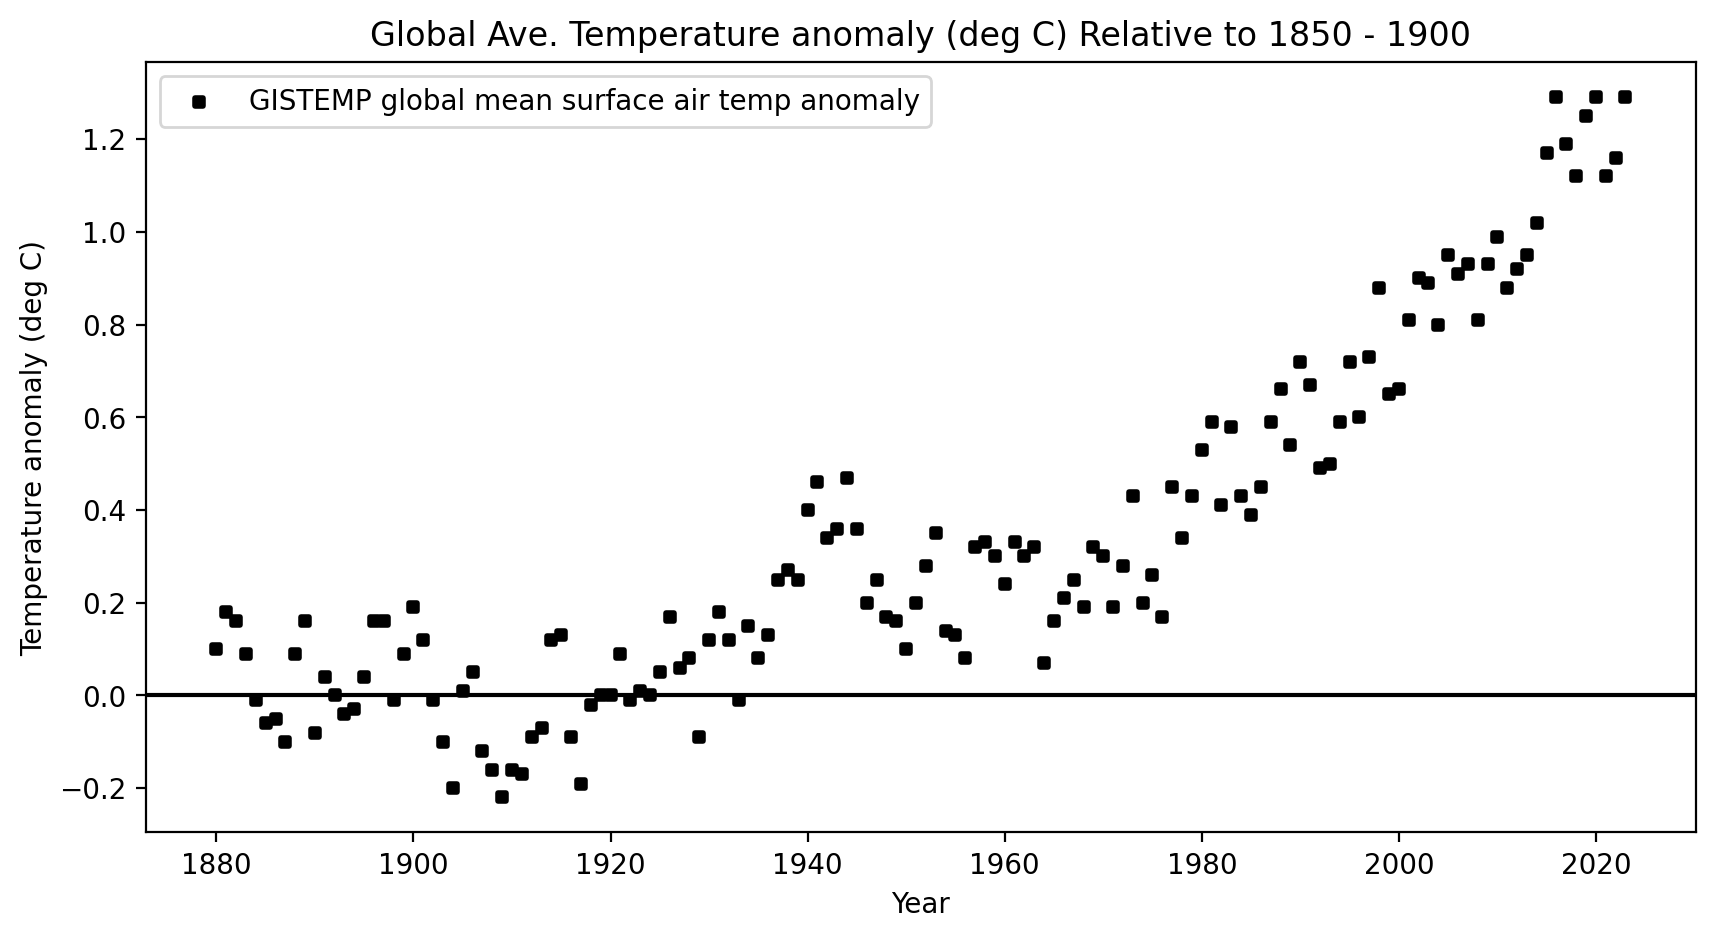

In [37]:
## Here we have added additional arguments of label, marker, s, and color to specify
## the lable for the legend, marker style with '.' indicating a dot, marker size,
## and marker color. There are more customizations you can make, but more on this later.
fig, ax = plt.subplots(figsize = (10, 5))

ax.scatter(GISS_temp['Year'],
        GISS_temp['GISTEMP (degC)'],
        linewidth=2,label='GISTEMP global mean surface air temp anomaly',
        color='black',
        s=8, marker='s') ## s == markersize == 5, marker == s == square

## plot a legend on the ax
ax.legend() 

## add a horizontal line at 0 !
ax.axhline(0,color='k')

## add plot title:
ax.set_title('Global Ave. Temperature anomaly (deg C) Relative to 1850 - 1900')

## add axes labes:
ax.set_ylabel('Temperature anomaly (deg C)')
ax.set_xlabel('Year')

### Line plot WITH scatter points overtop!

Text(0.5, 0, 'Year')

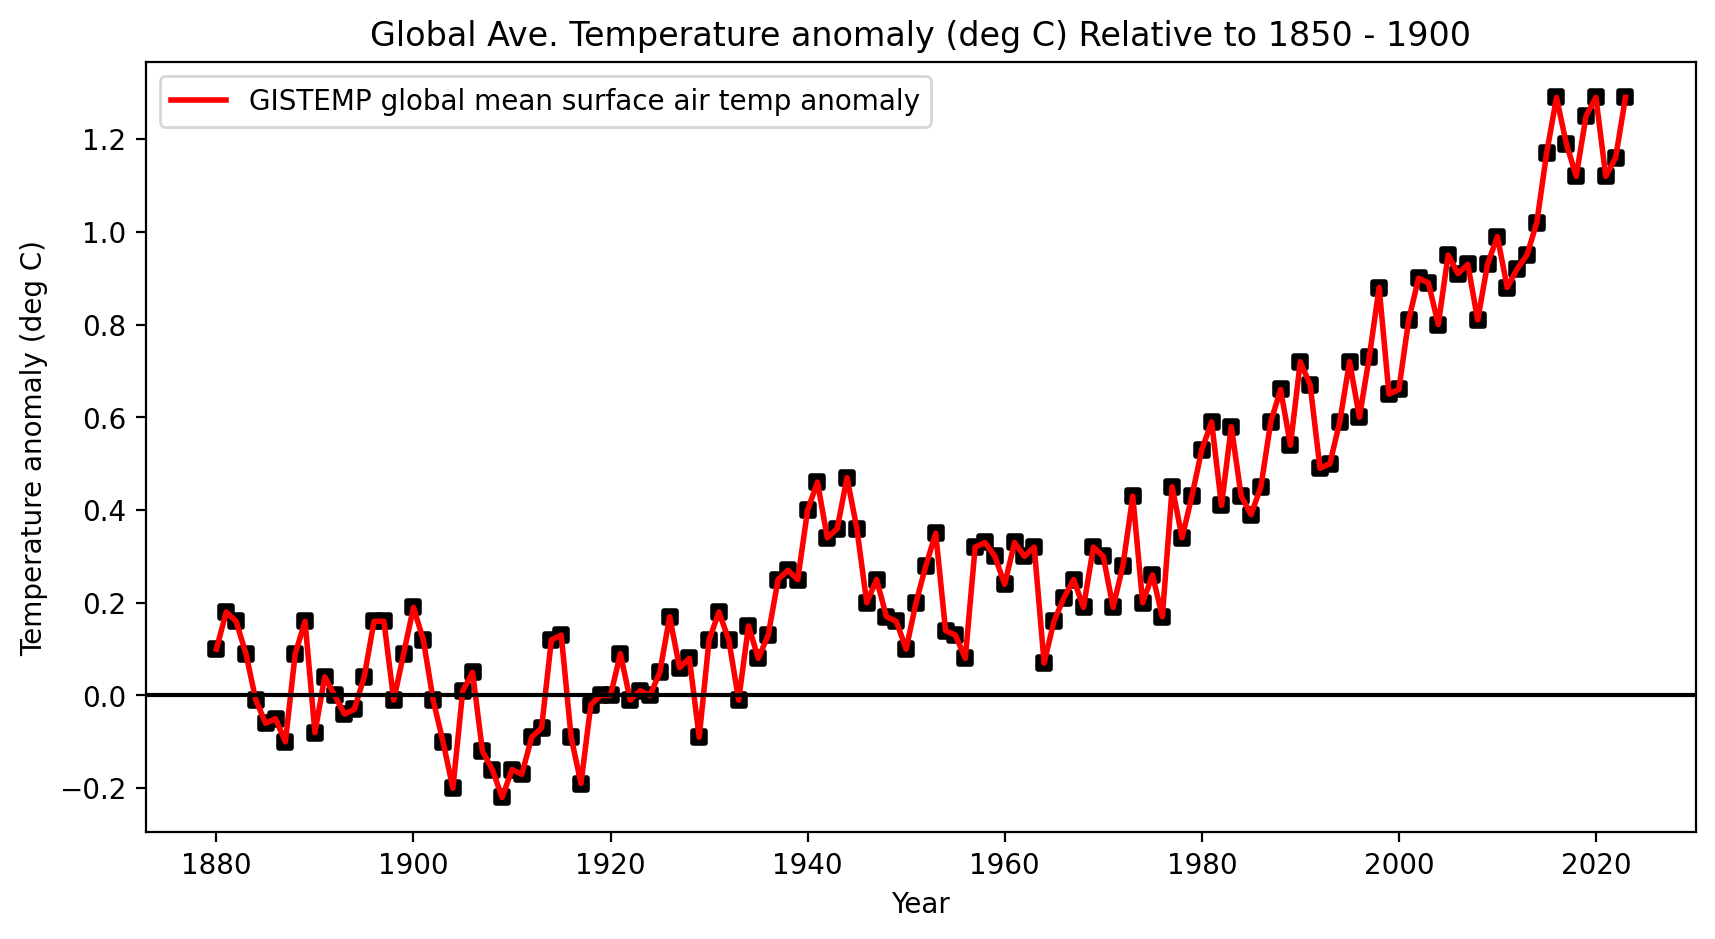

In [36]:
## Here we have added additional arguments of label, marker, s, and color to specify
## the lable for the legend, marker style with '.' indicating a dot, marker size,
## and marker color. There are more customizations you can make, but more on this later.
fig, ax = plt.subplots(figsize = (10, 5))

ax.plot(GISS_temp['Year'],
        GISS_temp['GISTEMP (degC)'],
        linewidth=2,label='GISTEMP global mean surface air temp anomaly',
        color='red')

ax.scatter(GISS_temp['Year'],
        GISS_temp['GISTEMP (degC)'],
        linewidth=2,#label='GISTEMP global mean surface air temp anomaly',
        color='k',
        s=20, marker='s') ## s == markersize == 5, marker == s == square


## plot a legend on the ax
ax.legend() 

## add a horizontal line at 0 !
ax.axhline(0,color='k')

## add plot title:
ax.set_title('Global Ave. Temperature anomaly (deg C) Relative to 1850 - 1900')

## add axes labes:
ax.set_ylabel('Temperature anomaly (deg C)')
ax.set_xlabel('Year')

### Bar Plot

Text(0.5, 0, 'Year')

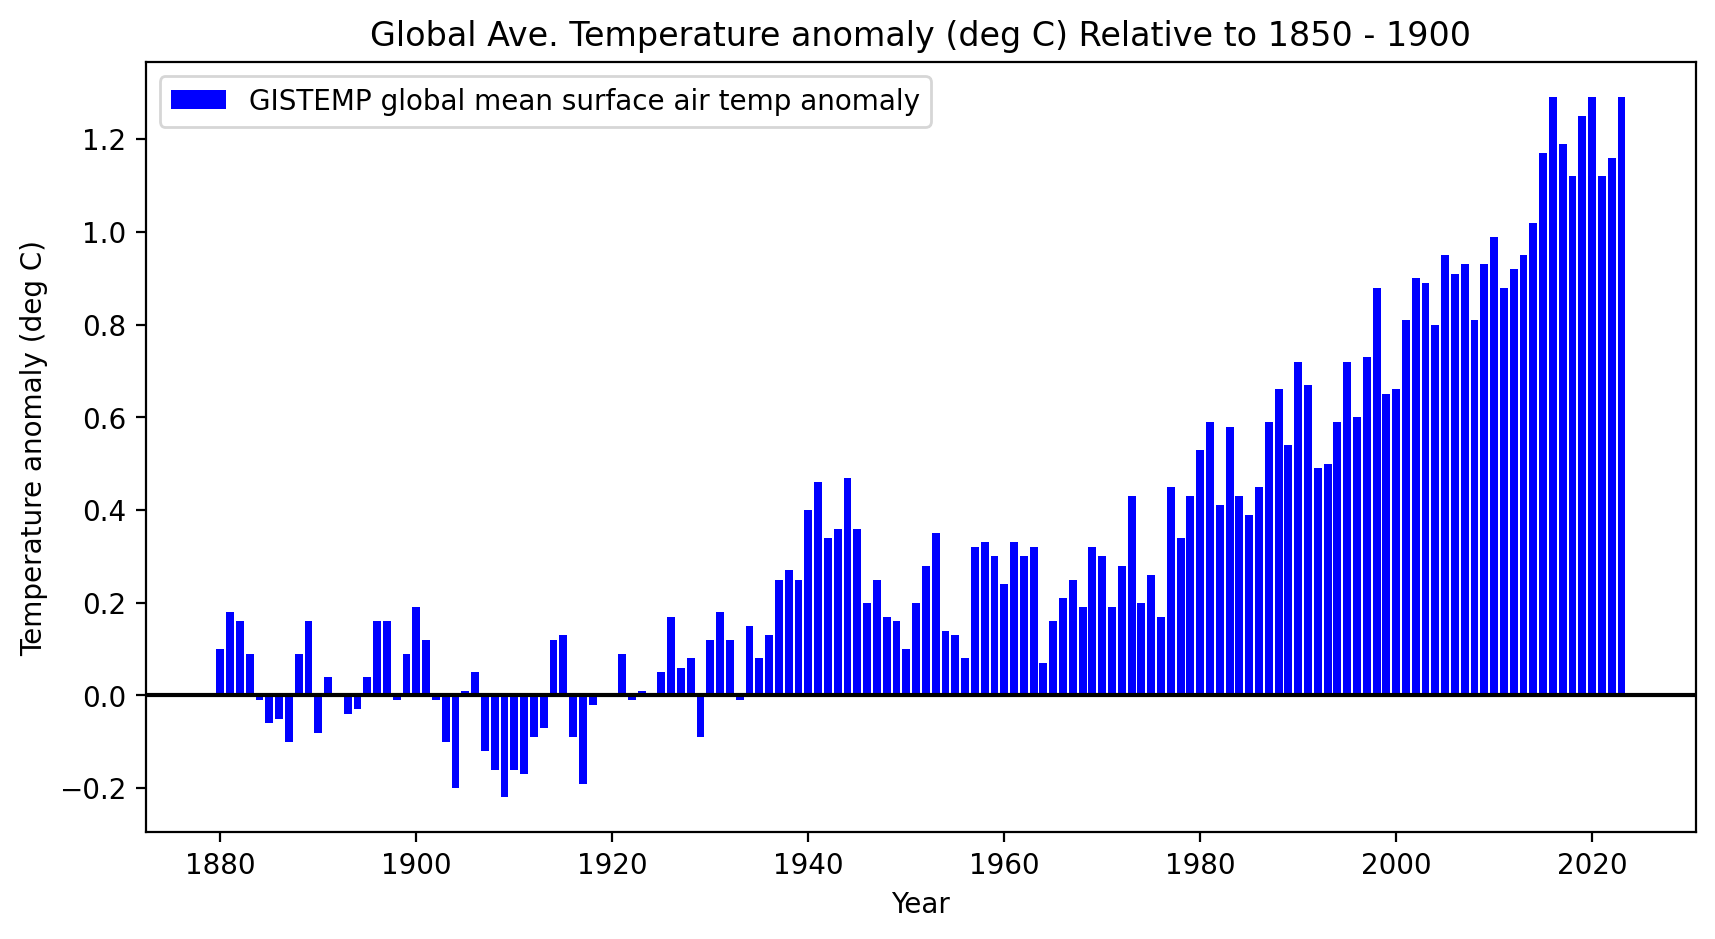

In [35]:
fig, ax = plt.subplots(figsize = (10, 5))

ax.bar(GISS_temp['Year'],
        GISS_temp['GISTEMP (degC)'],
        linewidth=2,label='GISTEMP global mean surface air temp anomaly',
        color='blue',
        ) 

## plot a legend on the ax
ax.legend()

## add a horizontal line at 0 !
ax.axhline(0,color='k')

## add plot title:
ax.set_title('Global Ave. Temperature anomaly (deg C) Relative to 1850 - 1900')

## add axes labes:
ax.set_ylabel('Temperature anomaly (deg C)')
ax.set_xlabel('Year')

Text(0.5, 0, 'Year')

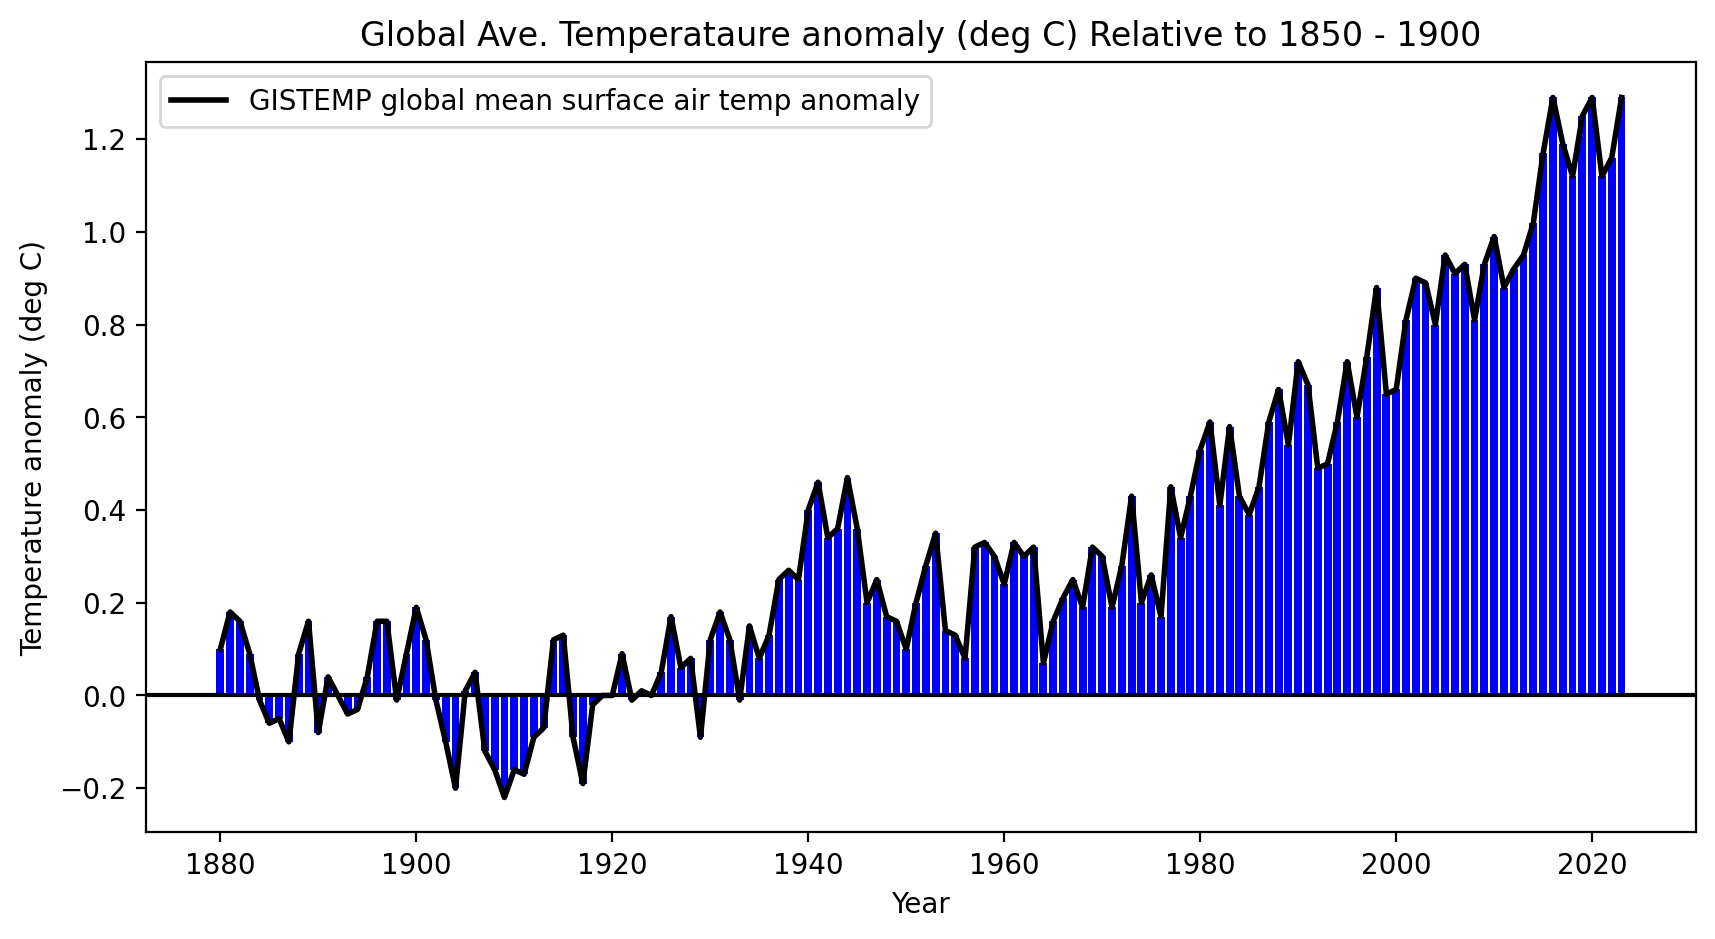

In [34]:
fig, ax = plt.subplots(figsize = (10, 5))

ax.bar(GISS_temp['Year'],
        GISS_temp['GISTEMP (degC)'],
        linewidth=2,#label='GISTEMP global mean surface air temp anomaly',
        color='blue',
        ) 

ax.plot(GISS_temp['Year'],
        GISS_temp['GISTEMP (degC)'],
        linewidth=2,label='GISTEMP global mean surface air temp anomaly',
        color='k')

## plot a legend on the ax
ax.legend()

## add a horizontal line at 0 !
ax.axhline(0,color='k')

## add plot title:
ax.set_title('Global Ave. Temperataure anomaly (deg C) Relative to 1850 - 1900')

## add axes labes:
ax.set_ylabel('Temperature anomaly (deg C)')
ax.set_xlabel('Year')

### Fill the space in between instead of bars:

Text(0.5, 0, 'Year')

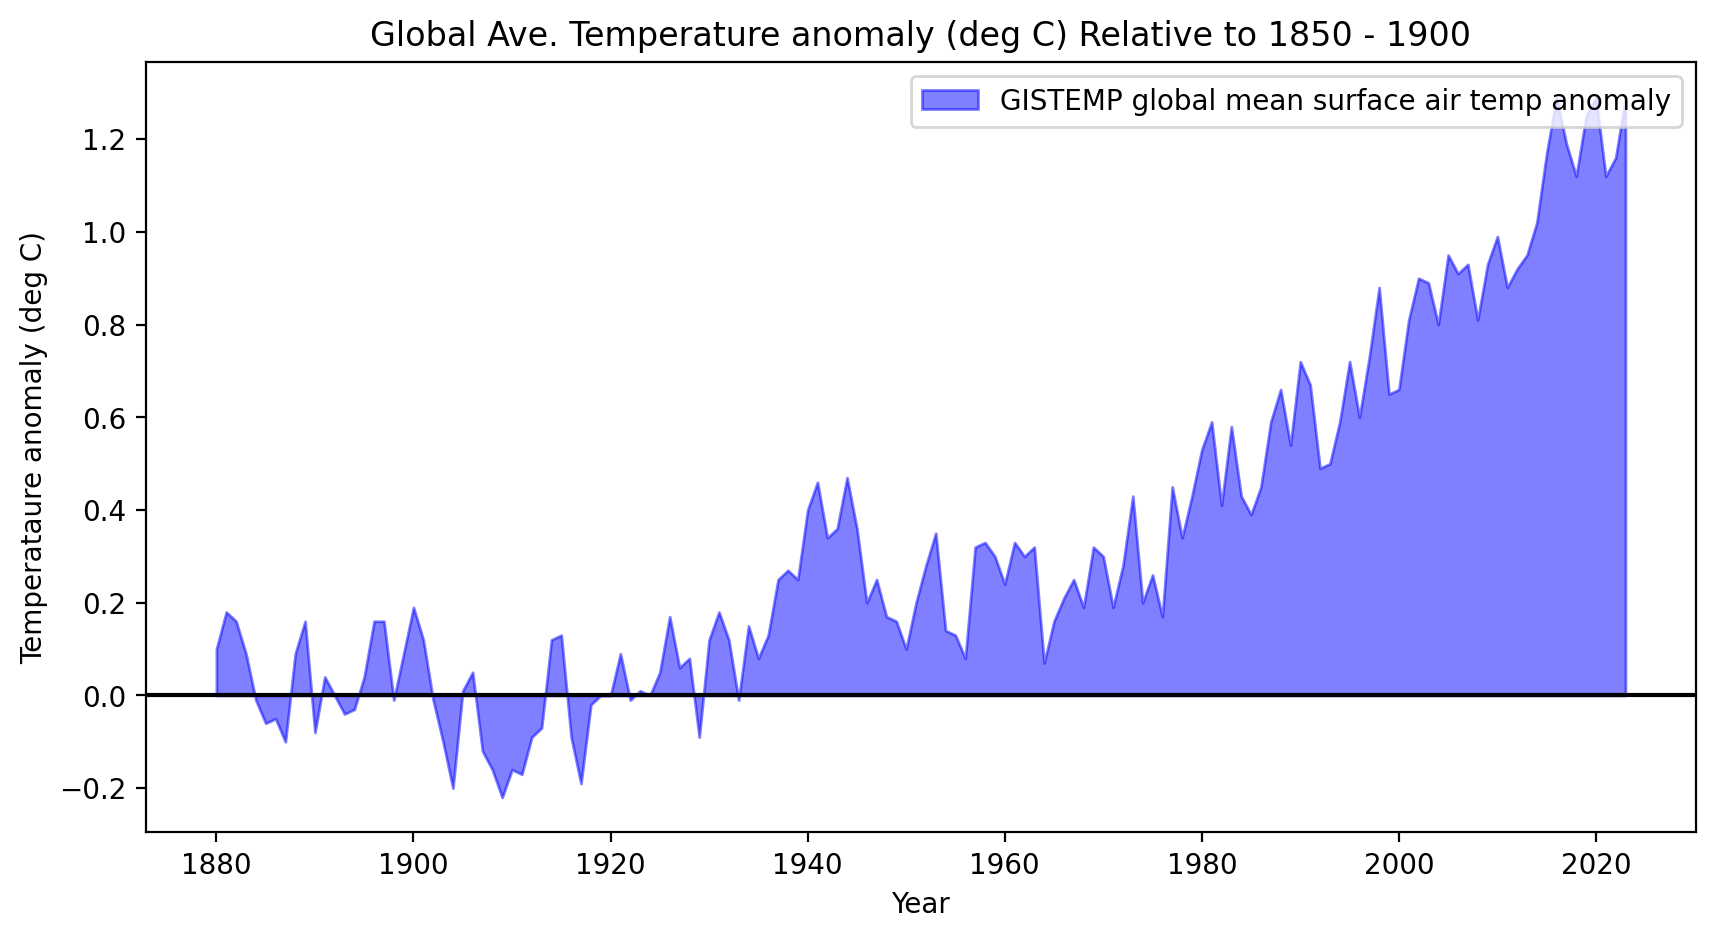

In [30]:
fig, ax = plt.subplots(figsize = (10, 5))

ax.fill_between(GISS_temp['Year'], 0, GISS_temp['GISTEMP (degC)'],
             color = "blue",
             alpha = 0.50, ### alpha is the transparency!
             label = 'GISTEMP global mean surface air temp anomaly')

## plot a legend on the ax
ax.legend()

## add a horizontal line at 0 !
ax.axhline(0,color='k')

## add plot title:
ax.set_title('Global Ave. Temperature anomaly (deg C) Relative to 1850 - 1900')

## add axes labes:
ax.set_ylabel('Temperature anomaly (deg C)')
ax.set_xlabel('Year')

### What if I wanted the fill color to communicate information regarding the magitidue of the anomaly? i.e., __how__ warm it is relative to the baseline period.

### Bar plot with color palette

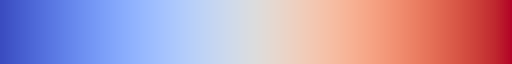

In [14]:
# Import cm and colormaps from matplotlib and create aliases
from matplotlib import cm
from matplotlib import colormaps as colormap
cool_warm_cmap = colormap["coolwarm"]
cool_warm_cmap

In [76]:
# Normalize data for colormap
GISS_temp_values = GISS_temp['GISTEMP (degC)']  ### Set the values to be used in our colormap
norm = plt.Normalize(min(GISS_temp_values), 
                     max(GISS_temp_values))

# Apply colormap --- two different colormaps as examples
cmap_coolwarm = colormap.get_cmap('coolwarm')
cmap_thermal = colormap.get_cmap(cmocean.cm.thermal)

bar_colors_coolwarm = cmap_coolwarm(norm(GISS_temp_values))
bar_colors_thermal = cmap_thermal(norm(GISS_temp_values))

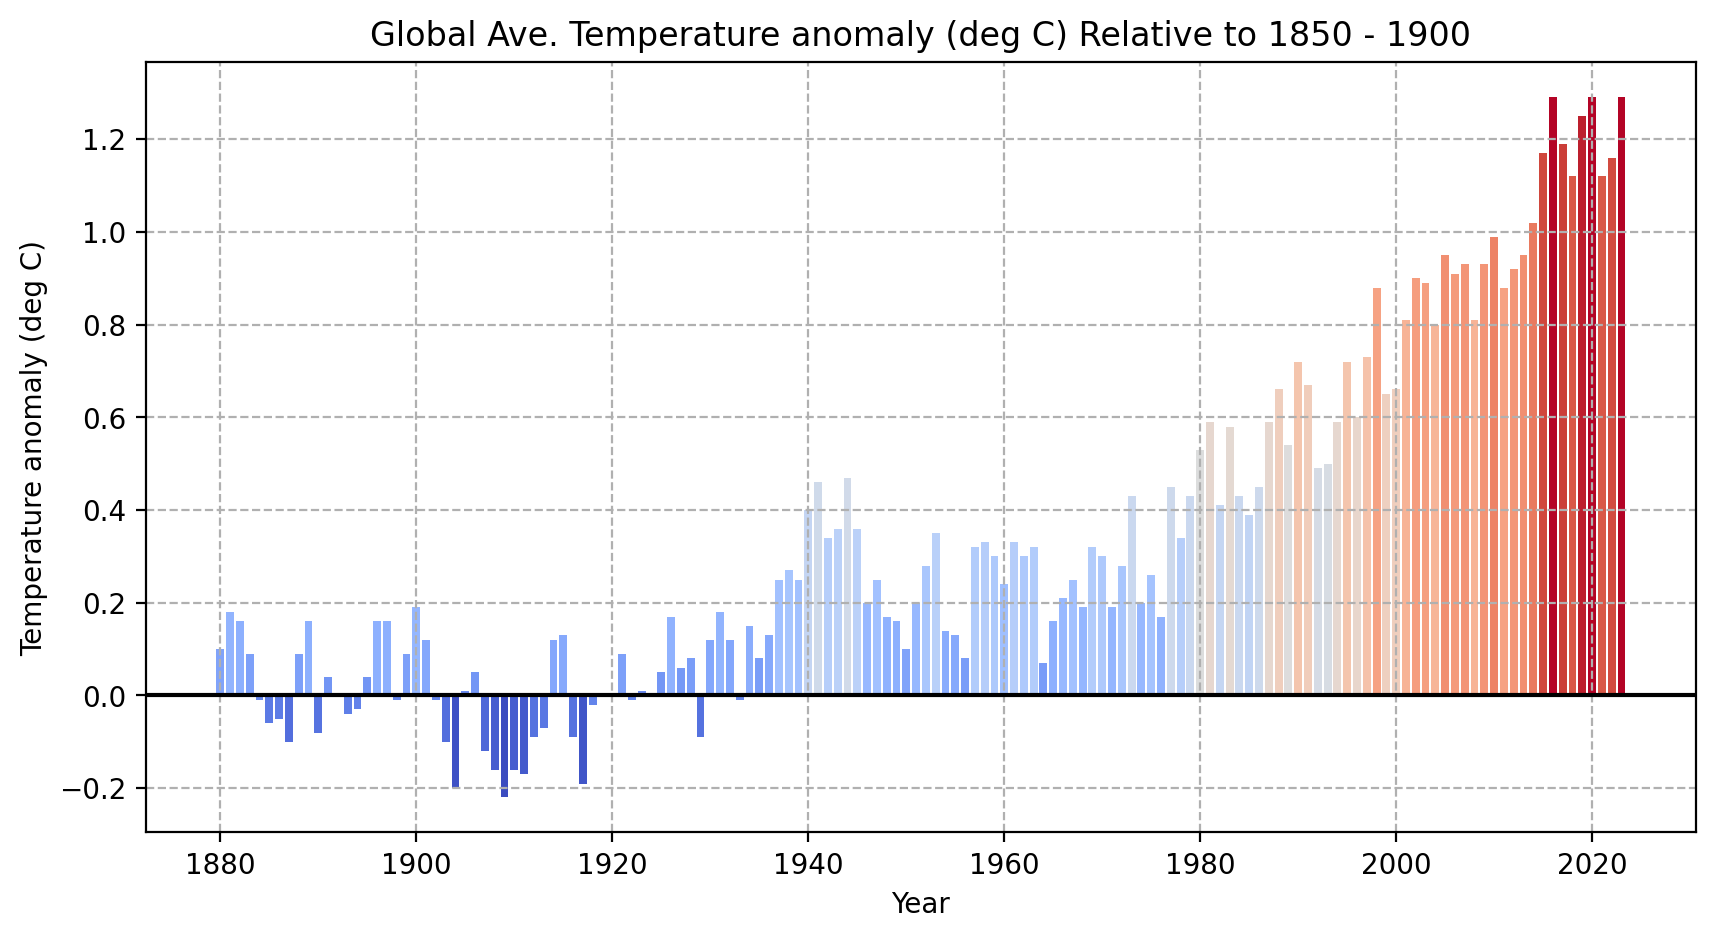

In [93]:
fig, ax = plt.subplots(figsize = (10, 5))

ax.bar(GISS_temp['Year'],
        GISS_temp['GISTEMP (degC)'],
        linewidth=2,label='GISTEMP global mean surface air temp anomaly',
        color=bar_colors_coolwarm
        ) 

## add a horizontal line at 0 !
ax.axhline(0,color='k')

## add plot title:
ax.set_title('Global Ave. Temperature anomaly (deg C) Relative to 1850 - 1900')

## add axes labes:
ax.set_ylabel('Temperature anomaly (deg C)')
ax.set_xlabel('Year')

ax.grid(linestyle='--') ### add dashed grid lines

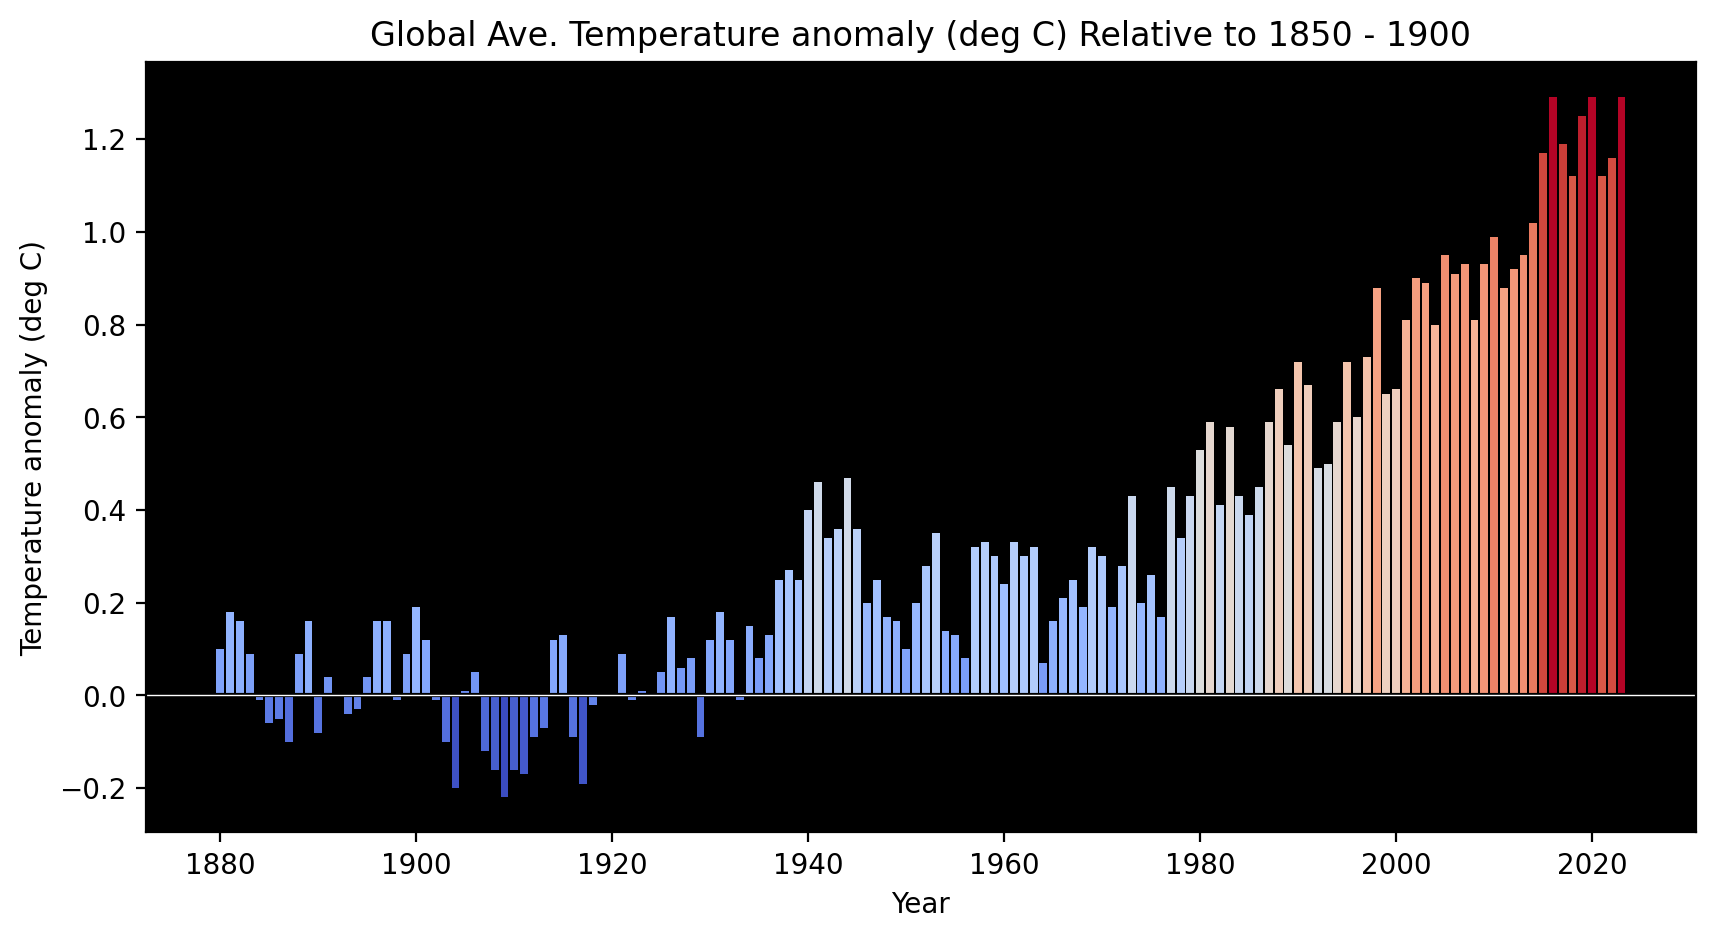

In [107]:
fig, ax = plt.subplots(figsize = (10, 5))

ax.bar(GISS_temp['Year'],
        GISS_temp['GISTEMP (degC)'],
        linewidth=2,label='GISTEMP global mean surface air temp anomaly',
        color=bar_colors_coolwarm
        ) 

## add a horizontal line at 0 !
ax.axhline(0,color='k')

## add plot title:
ax.set_title('Global Ave. Temperature anomaly (deg C) Relative to 1850 - 1900')

## add axes labes:
ax.set_ylabel('Temperature anomaly (deg C)')
ax.set_xlabel('Year')

#ax.grid(linestyle='--') ### add dashed grid lines

ax.set_facecolor("k")
ax.axhline(0,color='white',linewidth=0.5)

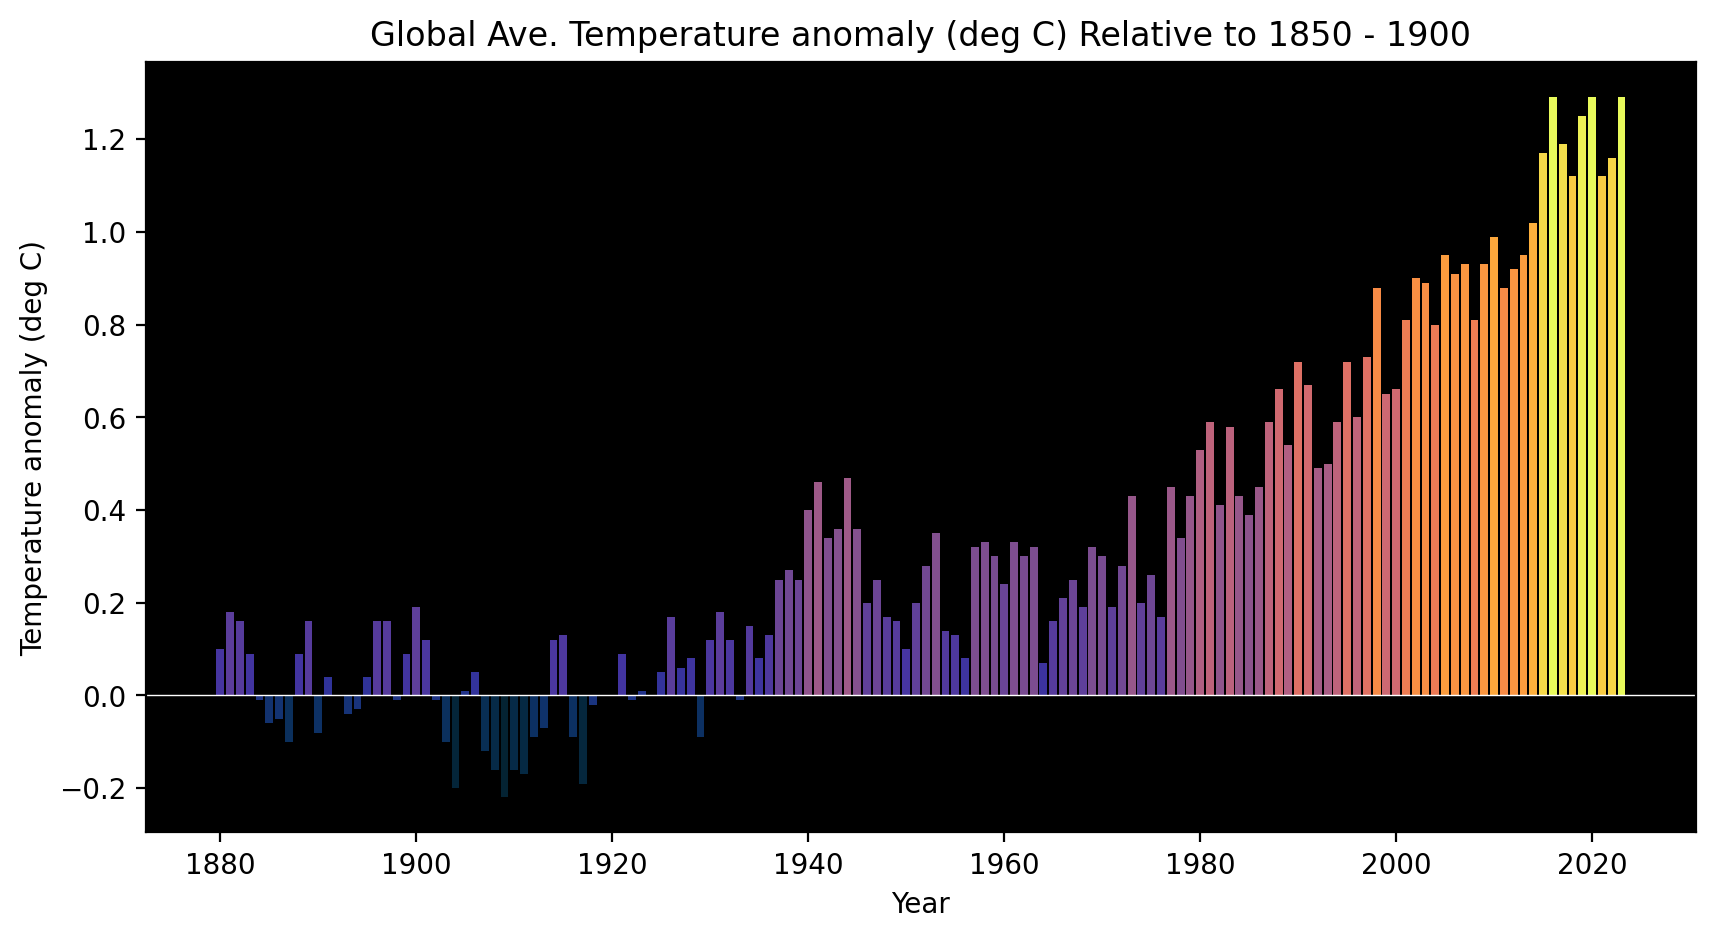

In [108]:
fig, ax = plt.subplots(figsize = (10, 5))

ax.bar(GISS_temp['Year'],
        GISS_temp['GISTEMP (degC)'],
        linewidth=2,label='GISTEMP global mean surface air temp anomaly',
        color=bar_colors_thermal
        ) 

## add a horizontal line at 0 !
ax.axhline(0,color='white',linewidth=0.5)

## add plot title:
ax.set_title('Global Ave. Temperature anomaly (deg C) Relative to 1850 - 1900')

## add axes labes:
ax.set_ylabel('Temperature anomaly (deg C)')
ax.set_xlabel('Year')

#ax.grid(linestyle='--') ### add dashed grid lines

# set plot background color
ax.set_facecolor("k")

### Filling in-between using a color map requires a bit more coding ... we won't go over this here, but consider the following as a reference for future studies if you wish:

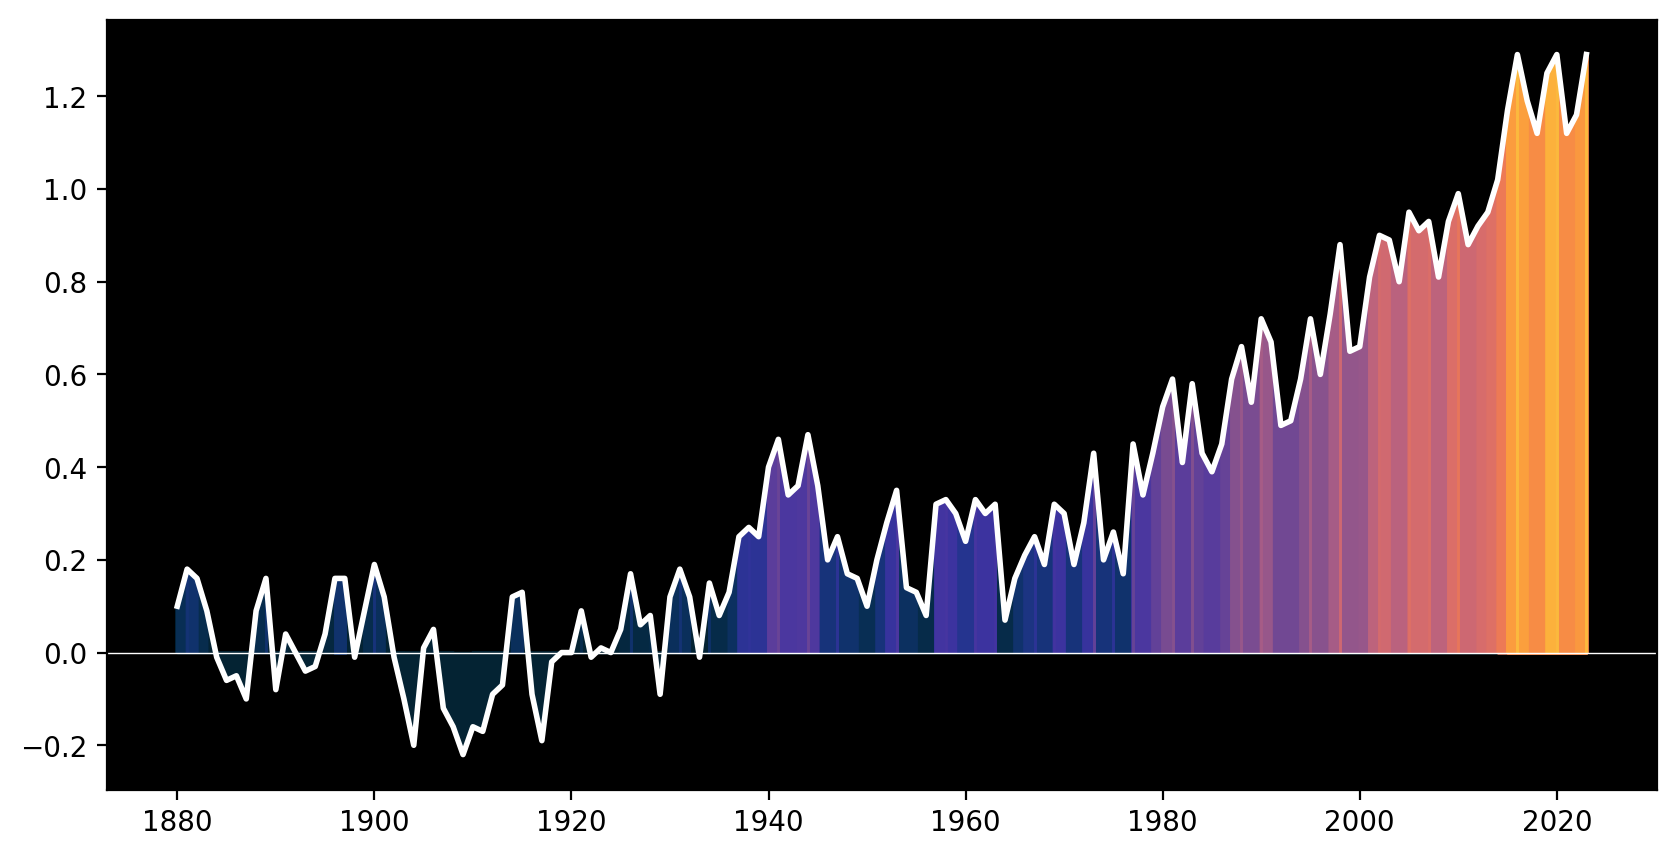

In [112]:
span = abs(min(GISS_temp_values) - max(GISS_temp_values))
color_index = np.arange(min(GISS_temp_values),max(GISS_temp_values),span/100)
color_index

import cmocean as cmo
cmap = colormap.get_cmap(cmo.cm.thermal)

fig, ax = plt.subplots(figsize = (10, 5))


for index in sorted(color_index):
    index_value = (index - 0)/span
    color=cmap(index_value)
    
    ax.fill_between(GISS_temp['Year'], 0, GISS_temp['GISTEMP (degC)'], where=(GISS_temp['GISTEMP (degC)'] >= index),
             color = color,
             label = 'GISTEMP global mean surface air temp anomaly')

ax.plot(GISS_temp['Year'],
        GISS_temp['GISTEMP (degC)'],
        linewidth=2,label='GISTEMP global mean surface air temp anomaly',
        color='white')

# set plot background color
ax.set_facecolor("k")
ax.axhline(0,color='white',linewidth=0.5)

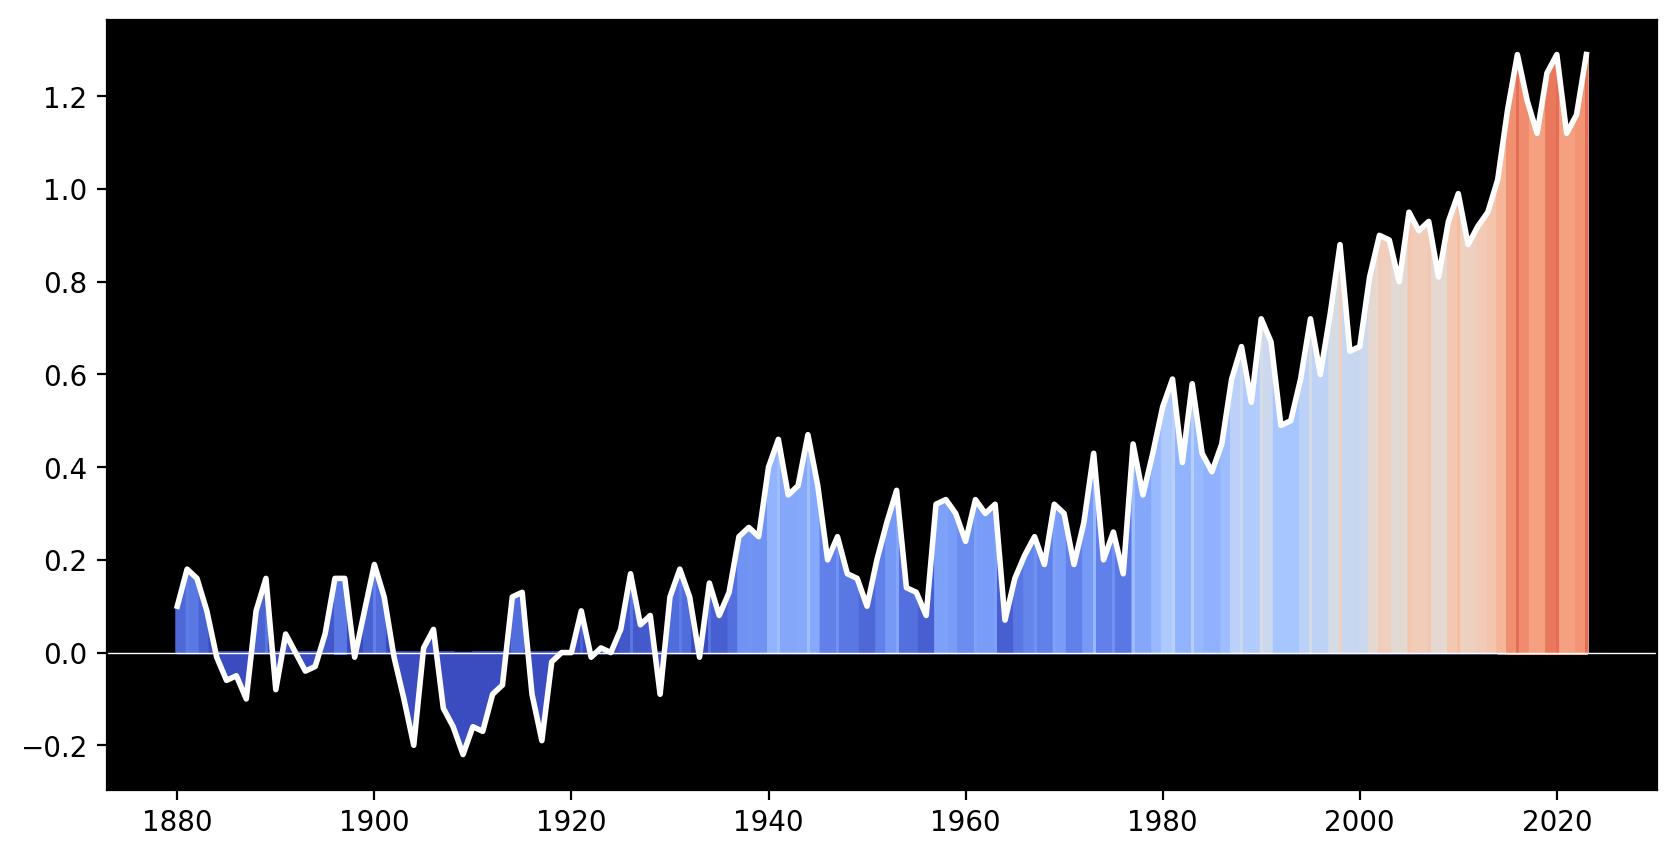

In [113]:
span = abs(min(GISS_temp_values) - max(GISS_temp_values))
color_index = np.arange(min(GISS_temp_values),max(GISS_temp_values),span/100)
color_index

import cmocean as cmo
cmap = colormap.get_cmap('coolwarm')

fig, ax = plt.subplots(figsize = (10, 5))


for index in sorted(color_index):
    index_value = (index - 0)/span
    color=cmap(index_value)
    
    ax.fill_between(GISS_temp['Year'], 0, GISS_temp['GISTEMP (degC)'], where=(GISS_temp['GISTEMP (degC)'] >= index),
             color = color,
             label = 'GISTEMP global mean surface air temp anomaly')

ax.plot(GISS_temp['Year'],
        GISS_temp['GISTEMP (degC)'],
        linewidth=2,label='GISTEMP global mean surface air temp anomaly',
        color='white')

# set plot background color
ax.set_facecolor("k")
ax.axhline(0,color='white',linewidth=0.5)

### Multiple datasets on a __single__ plot. Lets read in a few temperature datasets and make a simple plot of them all together.

In [119]:
GISS_temp = pd.read_csv('./data/temp/gmt_GISTEMP.csv')
HadCRUT5_temp = pd.read_csv('./data/temp/gmt_HadCRUT5.csv')
JRA55_temp = pd.read_csv('./data/temp/gmt_JRA-55.csv')

In [120]:
JRA55_temp

,Year,JRA-55 (degC),JRA-55 uncertainty
0,1958,0.41,NaN
1,1959,0.35,NaN
2,1960,0.33,NaN
3,1961,0.35,NaN
4,1962,0.34,NaN
...,...,...,...
60,2018,1.08,NaN
61,2019,1.24,NaN
62,2020,1.23,NaN
63,2021,1.08,NaN


Text(0.5, 0, 'Year')

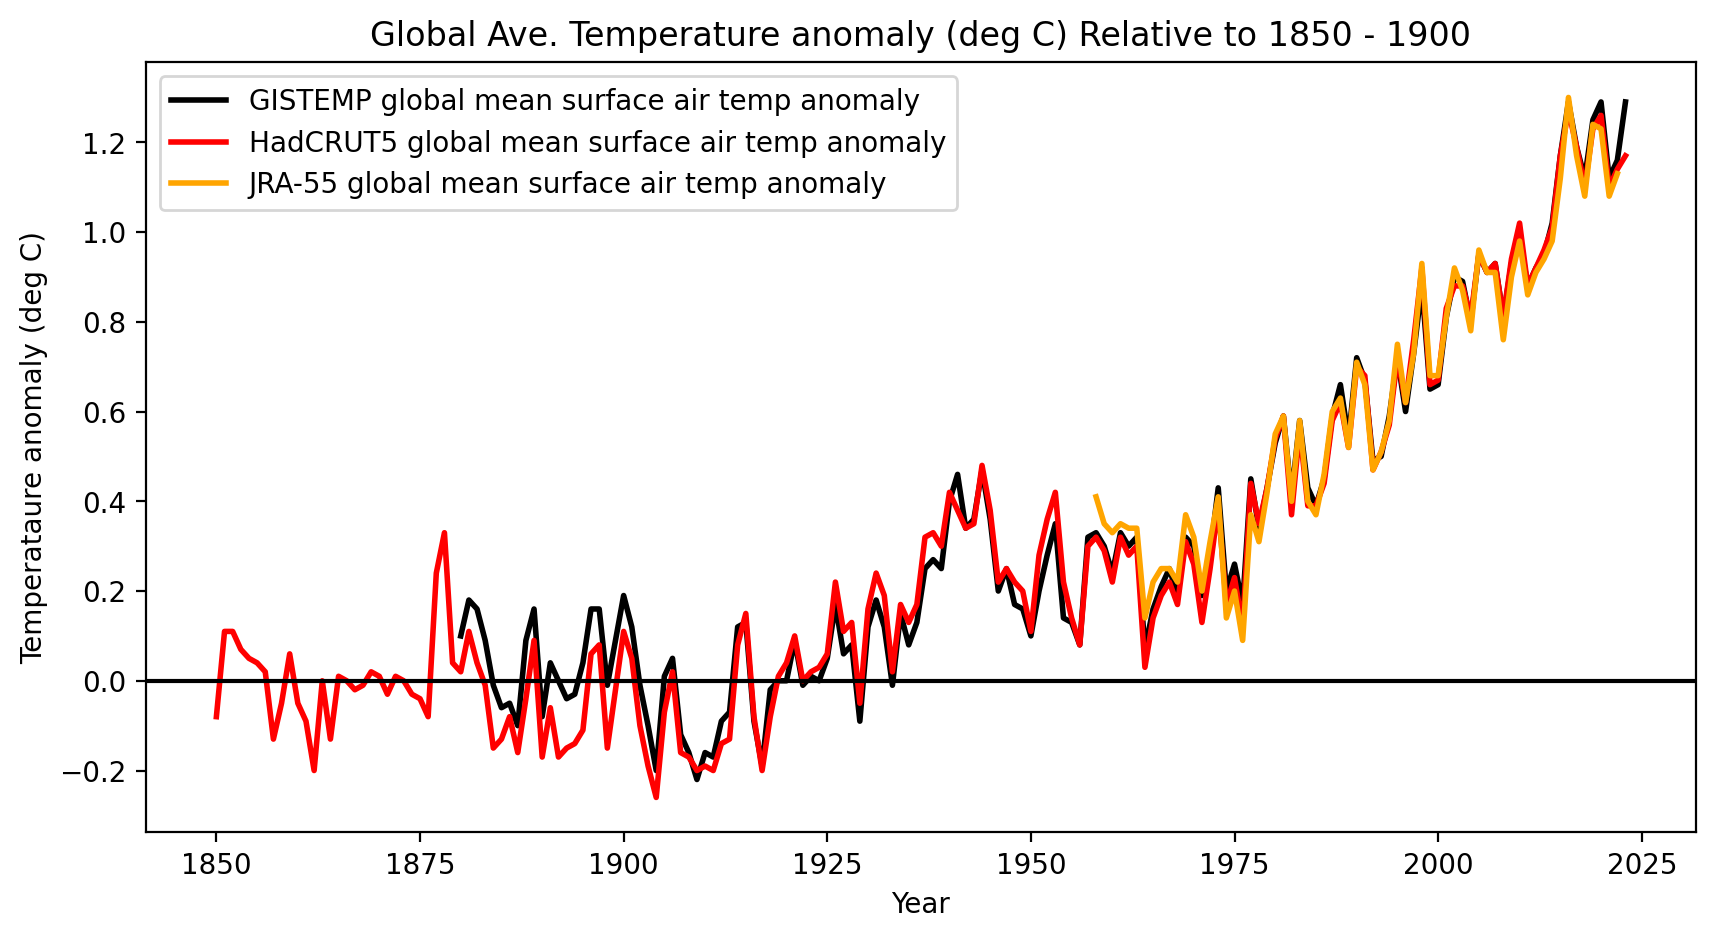

In [121]:
fig, ax = plt.subplots(figsize = (10, 5))

### add the GISS temp dataset to the plot first:
ax.plot(GISS_temp['Year'],
        GISS_temp['GISTEMP (degC)'],
        linewidth=2,label='GISTEMP global mean surface air temp anomaly',
        color='black')

### add the hadcrut5 dataset on top and change our label and color!
ax.plot(HadCRUT5_temp['Year'],
        HadCRUT5_temp['HadCRUT5 (degC)'],
        linewidth=2,label='HadCRUT5 global mean surface air temp anomaly',
        color='red')

### add the JRA-55 dataset on top and change our label and color!
ax.plot(JRA55_temp['Year'],
        JRA55_temp['JRA-55 (degC)'],
        linewidth=2,label='JRA-55 global mean surface air temp anomaly',
        color='orange')

## plot a legend on the ax
ax.legend() 

## add a horizontal line at 0 !
ax.axhline(0,color='k')

## add plot title:
ax.set_title('Global Ave. Temperature anomaly (deg C) Relative to 1850 - 1900')

## add axes labes:
ax.set_ylabel('Temperataure anomaly (deg C)')
ax.set_xlabel('Year')

### What if we had multiple datasets that we wanted show on seperate plots? Now this requires some developing the skill of __subplotting__.

#### Using matplotlib’s object-oriented approach makes it easier to include more than one plot in a figure by creating additional __axis objects__. In all the examples above, our `fig, ax = plt.subplots()` code only had one axis (`ax`), but we can add as many as we want ... remember, our `fig` is our blank canvas!

![](https://www.earthdatascience.org/images/earth-analytics/plot-data/fig-2-plots.png)
When creating a figure with multiple axis objects, you can arrange the plots across multiple rows and columns. Source: Earth Lab, Alana Faller

### In the example below, we specify the number of rows and columns we want within our `plt.subplots()` statement. In this case, we want 1 row and 2 columns.

* #### our first plot (column 1, row 1) is referred to as ax1
* #### our first plot (column 2, row 1) is referred to as ax2

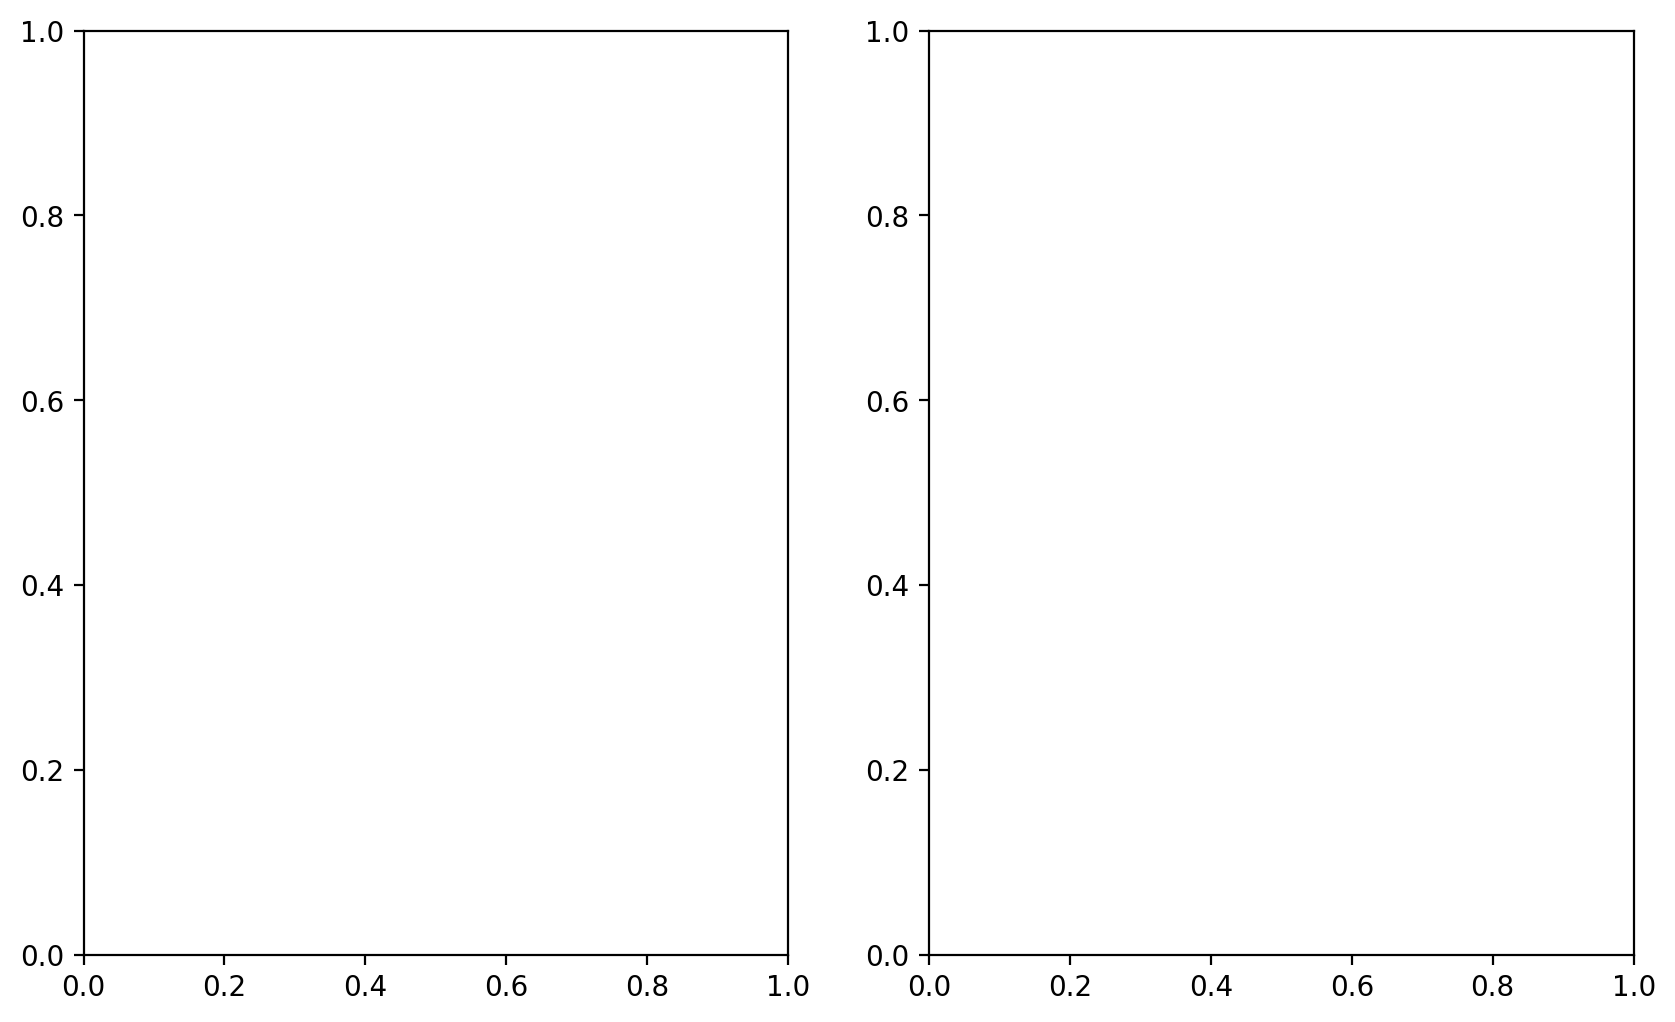

In [123]:
# Figure with two plots across one row
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 6))

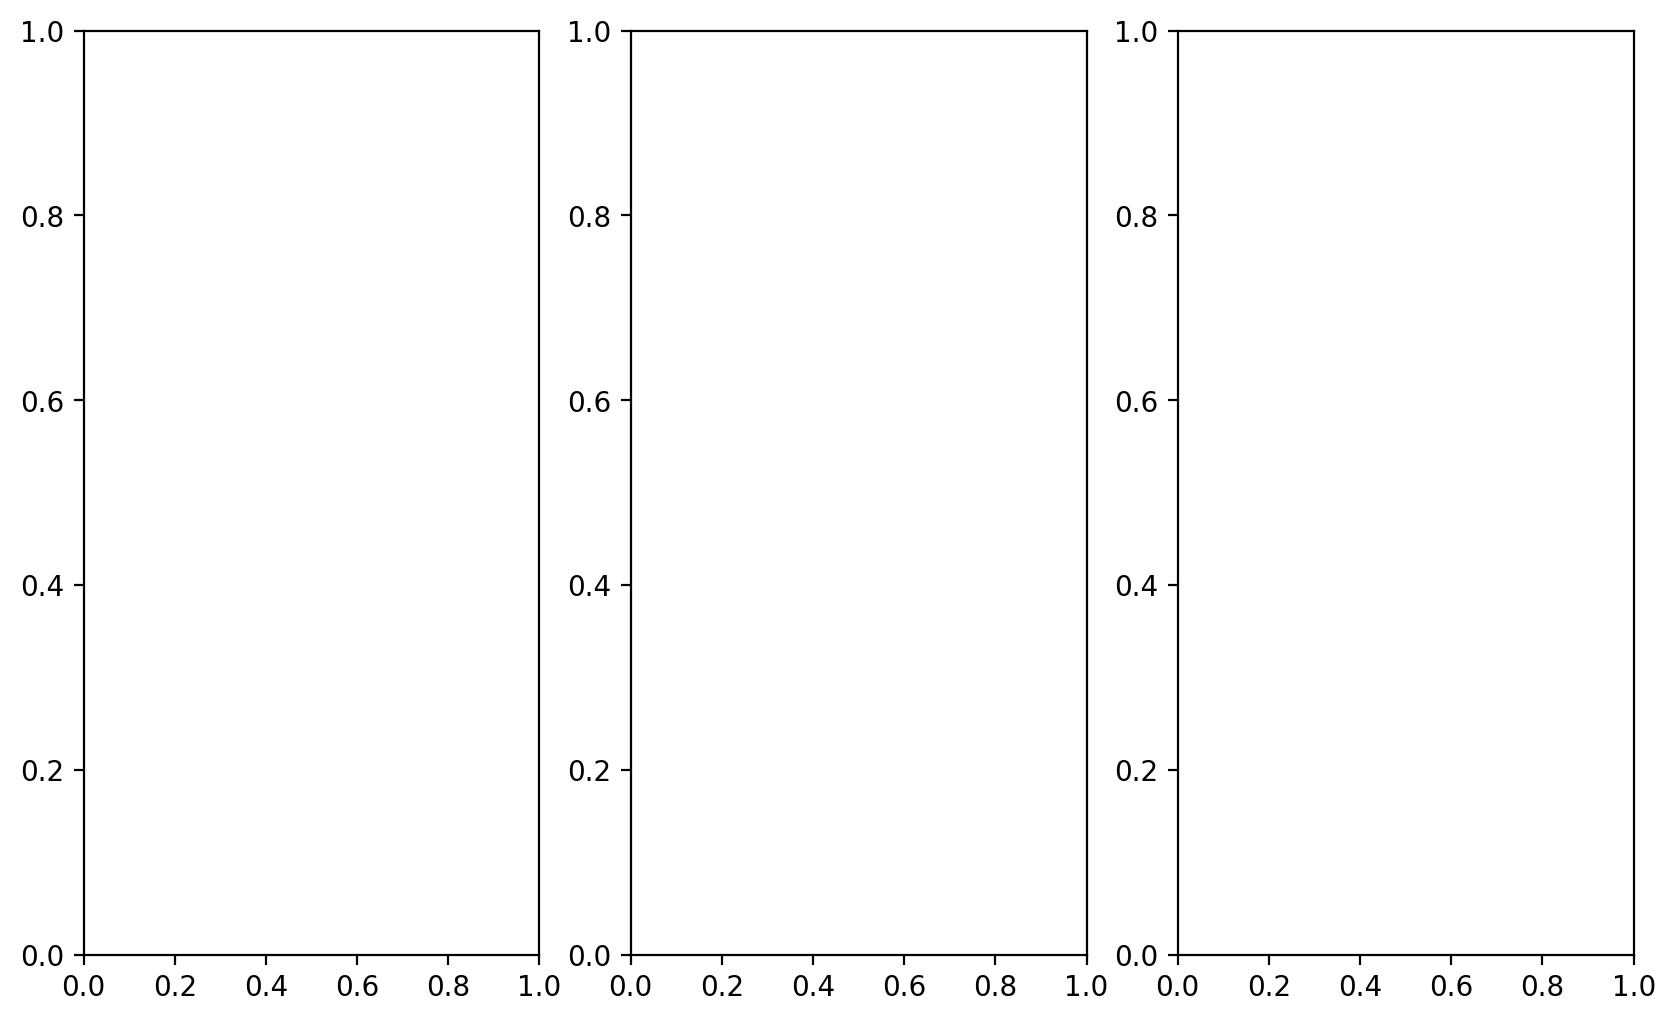

In [126]:
# Figure with three plots across one row
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (10, 6))

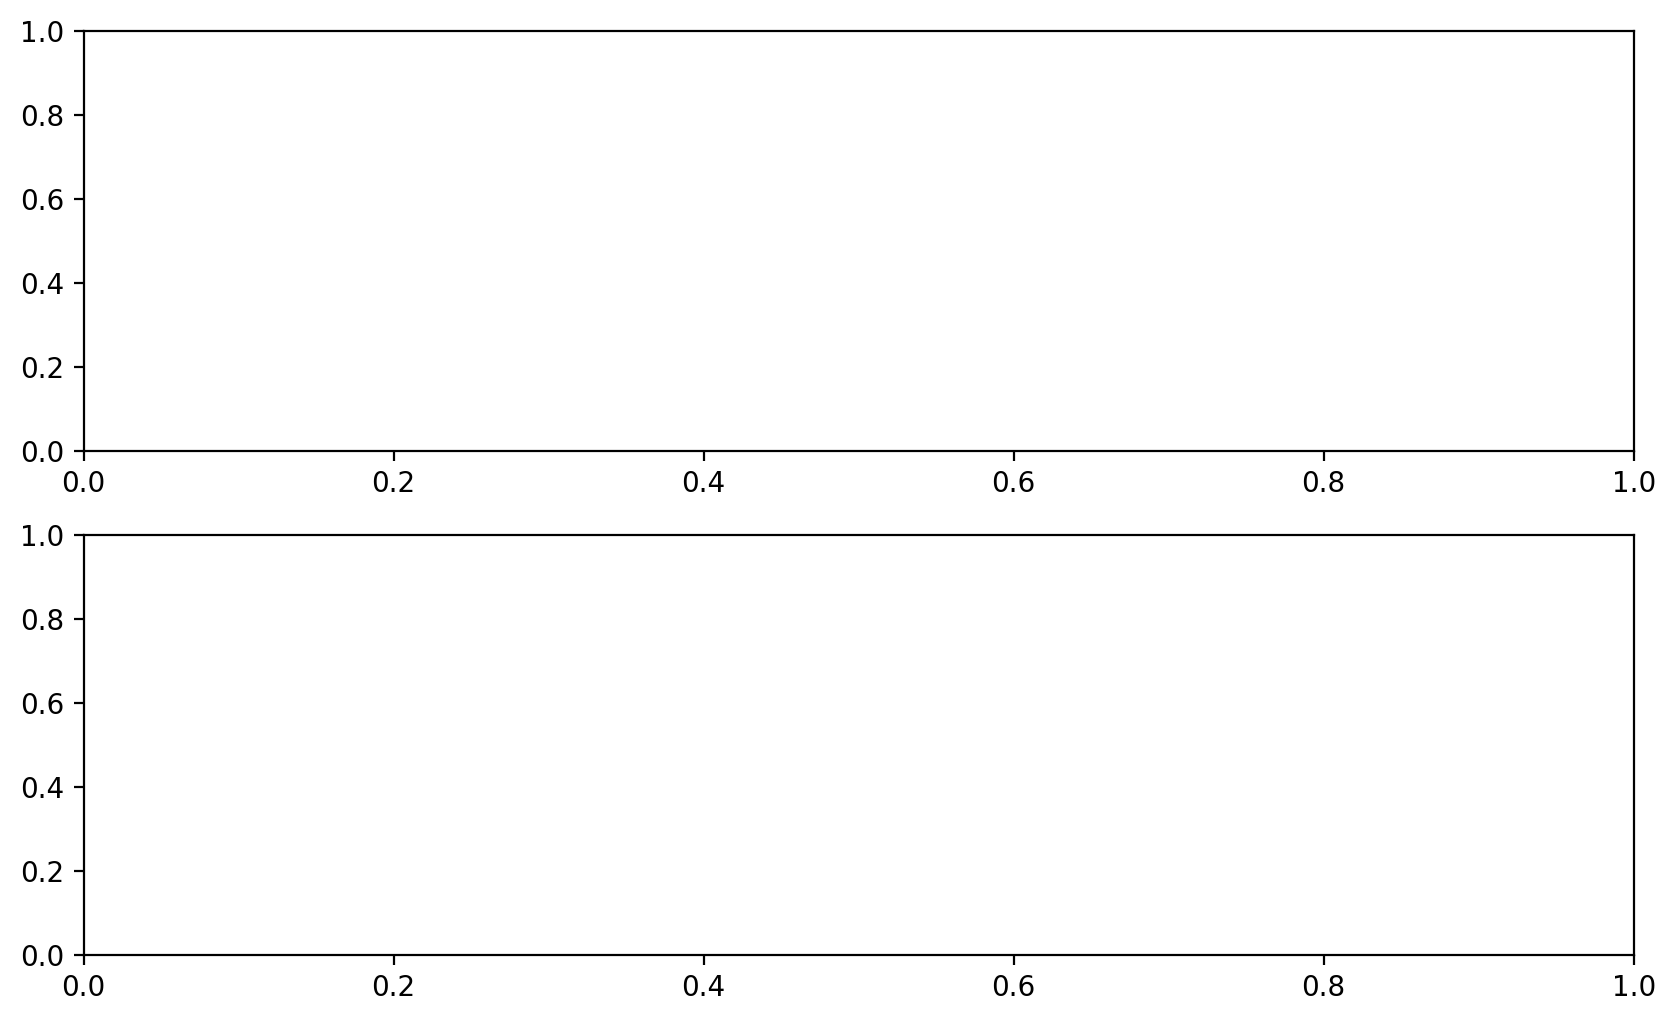

In [129]:
# Figure with two plots down one column
fig, (ax1, ax2) = plt.subplots(nrows = 2, ncols = 1, figsize = (10, 6))

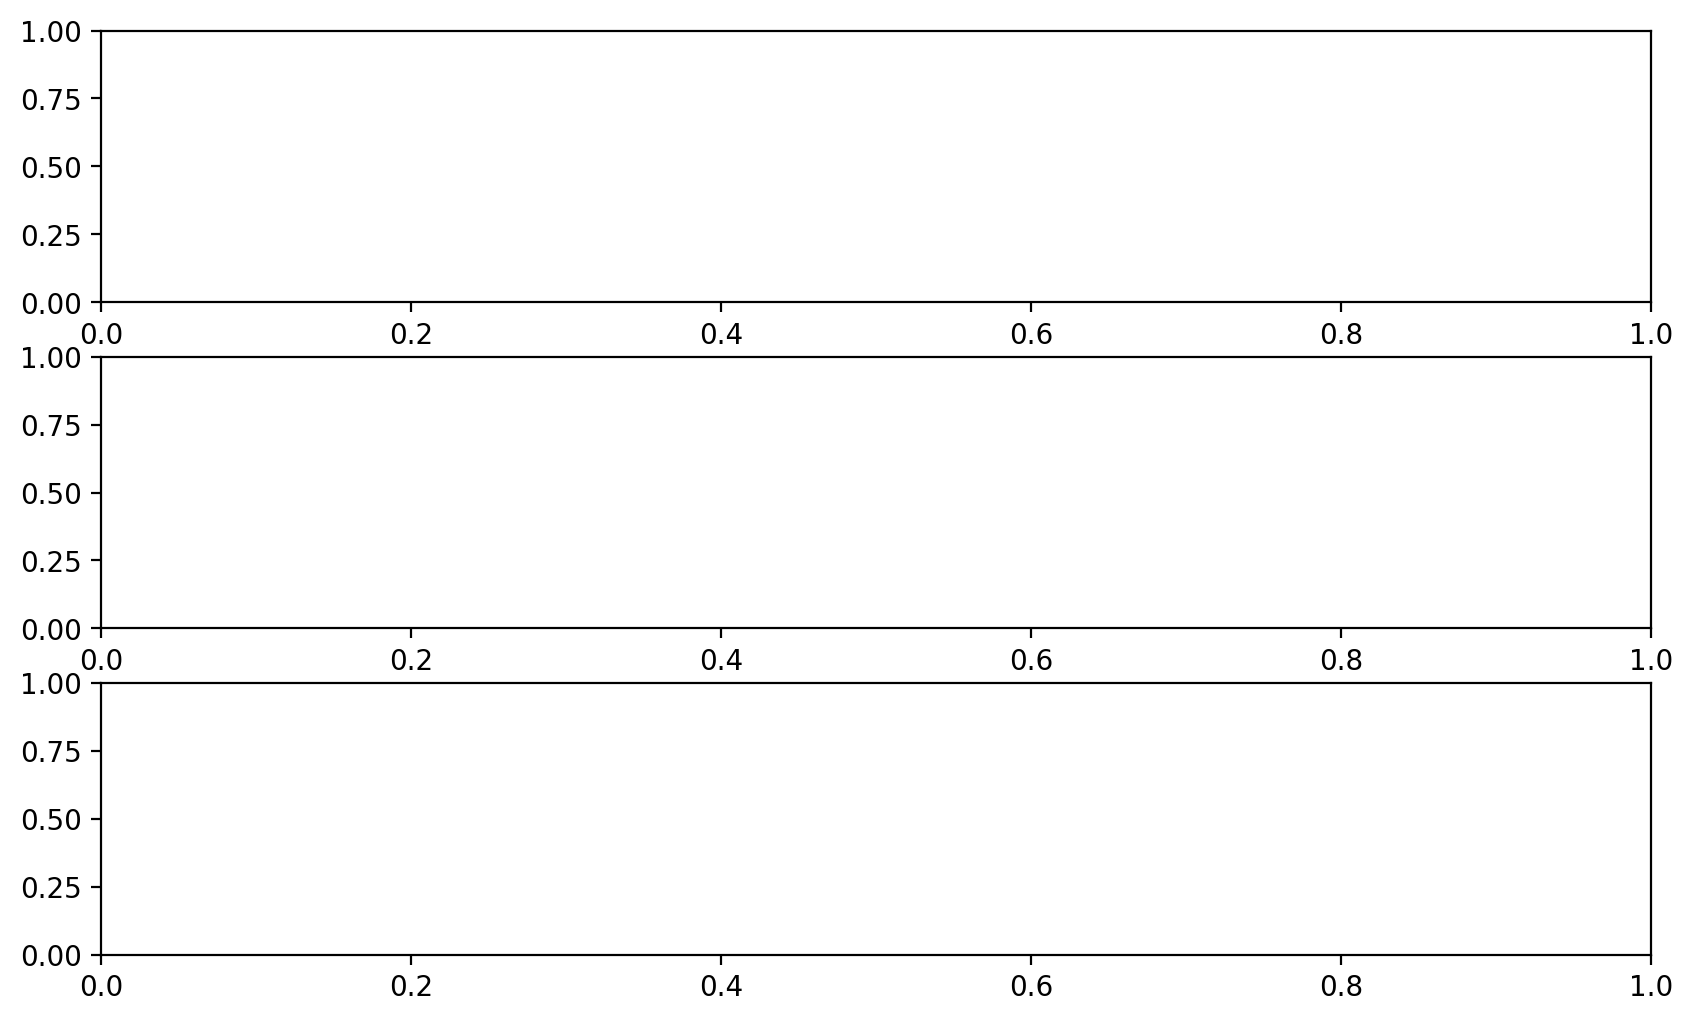

In [130]:
# Figure with three plots down one column
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 3, ncols = 1, figsize = (10, 6))

### You can play around with both the number of rows and columns as well as `figsize` to arrive at the look that you want.

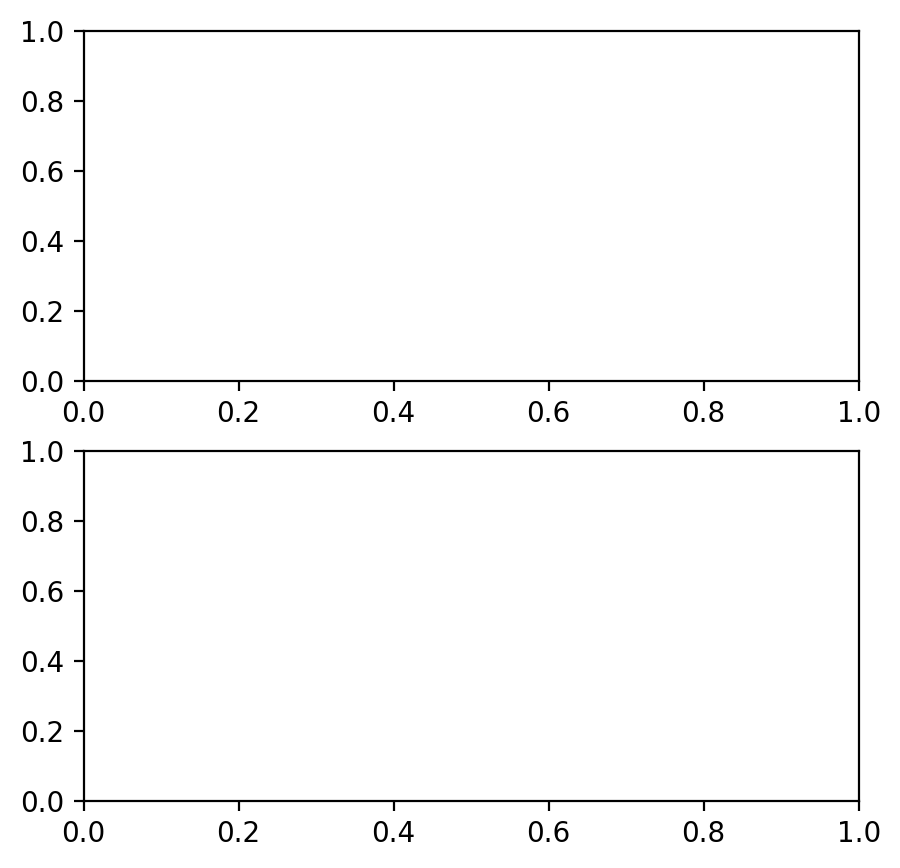

In [131]:
# Figure with three plots down one column
fig, (ax1, ax2) = plt.subplots(nrows = 2, ncols = 1, figsize = (5, 5))

## A key benefit of the matplotlib object oriented approach is that __each axis is its own object and can be customized independently of the other plots__ in the figure. In the example below for each individual plot, we put the associated ax before it (`ax1.plot()`, `ax2.plot()`, .. etc):



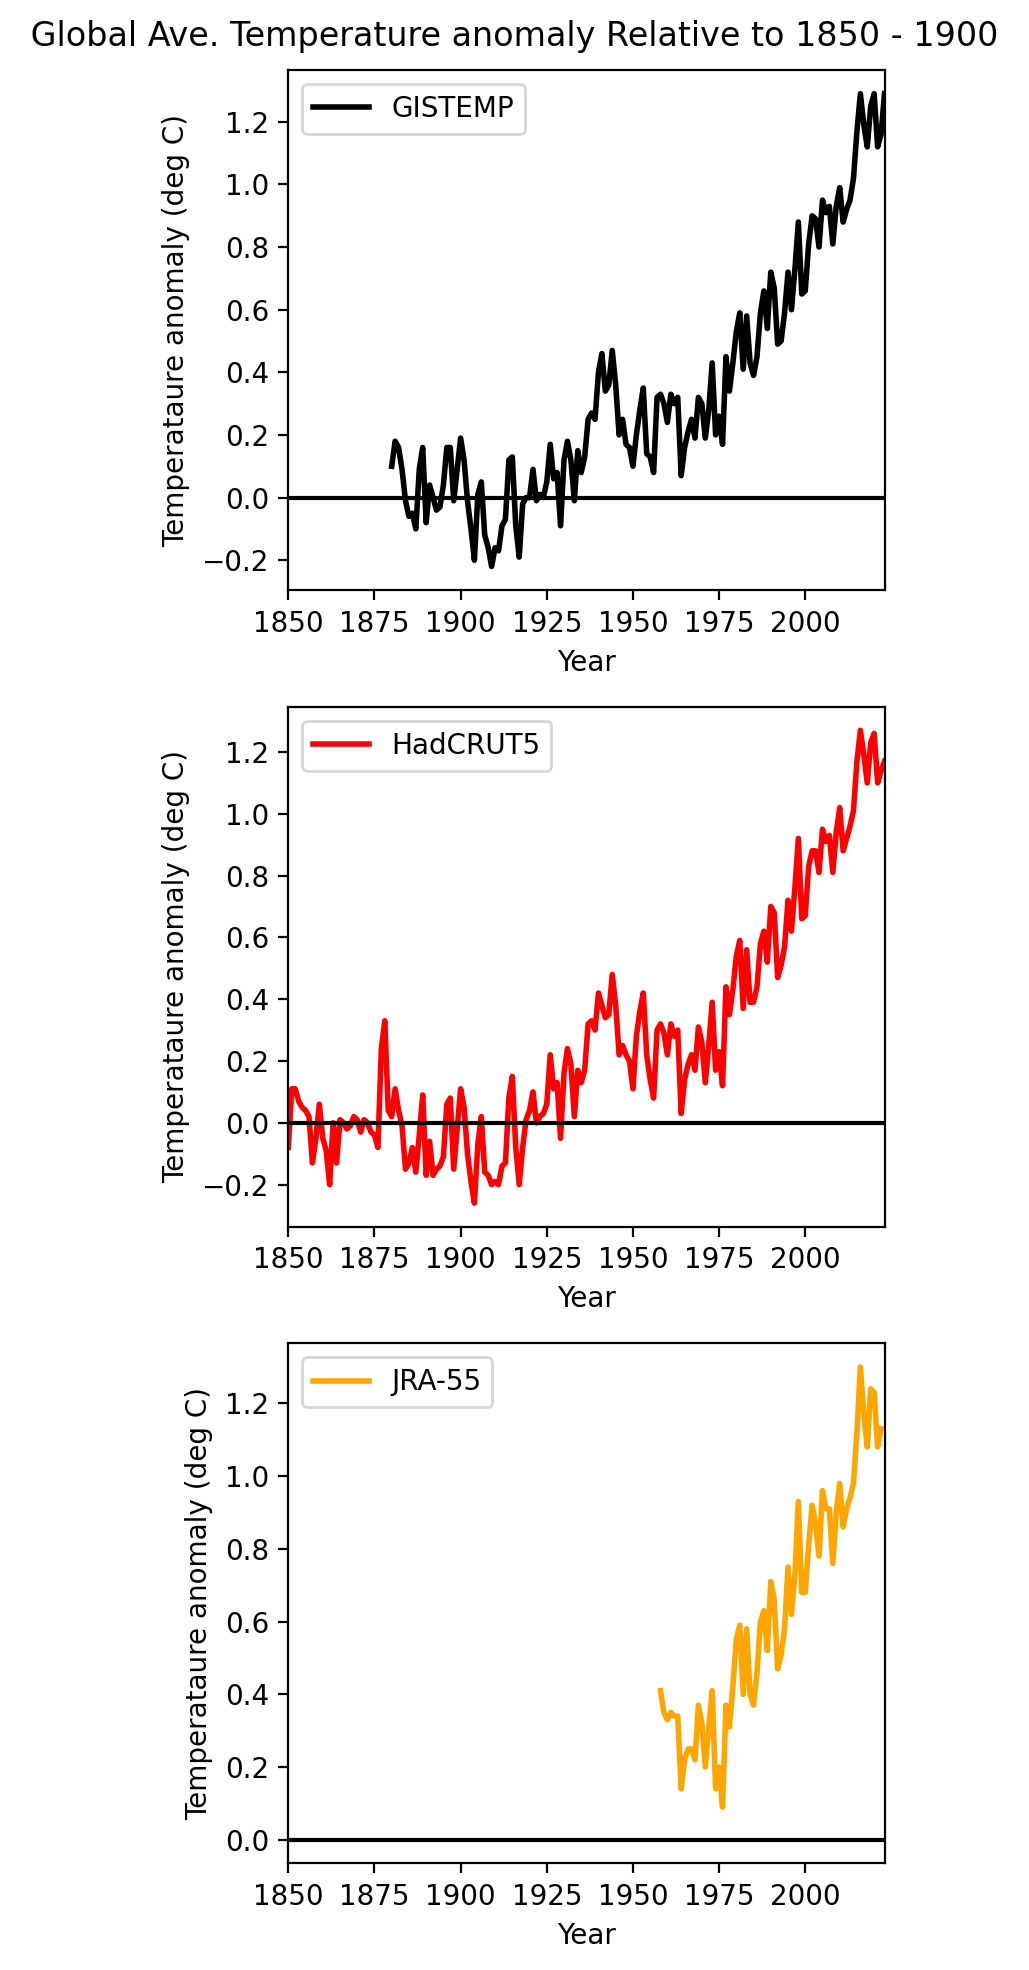

In [160]:
# Figure with three plots down one column
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 3, ncols = 1, figsize = (4, 10))

### add the GISS temp dataset to the first plot (ax1):
ax1.plot(GISS_temp['Year'],
        GISS_temp['GISTEMP (degC)'],
        linewidth=2,label='GISTEMP',
        color='black')

### add the hadcrut5 dataset on top and change our label and color!
ax2.plot(HadCRUT5_temp['Year'],
        HadCRUT5_temp['HadCRUT5 (degC)'],
        linewidth=2,label='HadCRUT5',
        color='red')

### add the hadcrut5 dataset on top and change our label and color!
ax3.plot(JRA55_temp['Year'],
        JRA55_temp['JRA-55 (degC)'],
        linewidth=2,label='JRA-55',
        color='orange')

#### set up all our labels etc:

## plot a legend on the ax
ax1.legend() 
ax1.axhline(0,color='k')
ax1.set_ylabel('Temperataure anomaly (deg C)')
ax1.set_xlabel('Year')
ax1.set_xlim(1850,2023) ## set our x-axis limits so that they show the same period for every plot.

## plot a legend on the ax
ax2.legend() 
ax2.axhline(0,color='k')
ax2.set_ylabel('Temperataure anomaly (deg C)')
ax2.set_xlabel('Year')
ax2.set_xlim(1850,2023) ## set our x-axis limits so that they show the same period for every plot.


## plot a legend on the ax
ax3.legend() 
ax3.axhline(0,color='k')
ax3.set_ylabel('Temperataure anomaly (deg C)')
ax3.set_xlabel('Year')
ax3.set_xlim(1850,2023) ## set our x-axis limits so that they show the same period for every plot.


## add plot title:
## plt.title('Global Ave. Temperature anomaly (deg C) Relative to 1850 - 1900')

## Set an overall figure title
fig.suptitle(' Global Ave. Temperature anomaly Relative to 1850 - 1900 ', fontsize=12)

## Make everything look nicely spaced!
plt.tight_layout()

### Now that you know are familiar with the general syntax for plotting 1D datasets using Matplotlib, your task is to use the remainder of the class and the links listed below to complete the following assignment:

### <span style="color:red"> Complete the following:
* #### <span style="color:red"> Create a NEW notebook and rename it: GMSAT_TimeSeries_Analysis
* #### <span style="color:red"> Read in all the global mean surface air temperature datasets in the /data/temp/ directory (there are 6).
* #### <span style="color:red"> Using subplotting, create 6 seperate plots of the time series. All axes must be labeled and you must have a title.
* #### <span style="color:red"> Create a single plot with _all_ datasets on the plot, make each time series a seperate color and with a legend on the plot.
* #### <span style="color:red"> Pick one of the timeseries and make a very visually appealing figure! Play around with changing the fontsize, background colors, linewidth, markerstyle, colormaps, etc ...
* #### <span style="color:red"> In the cell below each figure (remember the figure is the _entire_ canvas ... create a Figure caption using Markdown.
* #### <span style="color:red"> The first cell of your notebook should contain descriptive Markdown that describes the purpose of the notebook and the author including contact information.       
* #### <span style="color:red"> Push your new notebook to your GitHub repository.

    
#### Here are some useful links for exploring the different colors available through Matplotlib as you customize your plots:

##### Matplotlib Color Demos -- there are limitless options for color customization in Matplotlib:
##### https://matplotlib.org/stable/gallery/color/color_demo.html#sphx-glr-gallery-color-color-demo-py
##### https://matplotlib.org/stable/gallery/color/named_colors.html (list of named colors)
    

### Shutting down your notebook (__don't do this yet!!__ These are just instructions for when class is over).
### Before shutting down, save your notebook with the disc icon in the Notebook toolbar. Go to the the File menu and click Shut Down to close the browser table and Jupyter Lab itself.